In [1]:
import numpy as np
from numpy import sin, cos, tan, pi
from numpy import arctan as atan
from numpy import linalg as la

from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.ticker import LinearLocator
import matplotlib as mpl

import math
from math import factorial as fact
import scipy as sy
import pandas as pd

import time

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))

# Zernikes

## Definitions

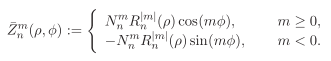

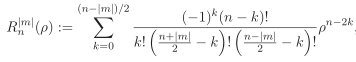

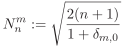

## Functions

In [2]:
def m_checker(n,m):
    ms = np.arange(-n,n+1,2)
    if (m in ms) == False:
        raise ValueError('invalid m')
    return

def n_mn(n,m):
    if m != 0:
        return (2*(n+1))**(1/2)
    else:
        return (n+1)**(1/2)

def r_mn(n,m,rho):
    stop = int((n-abs(m))/2)
    toRet = 0
    for k in range(stop+1):
        top = (-1)**k * fact(n-k) * rho**(n-2*k)
        bot = fact(k) * fact(int((n+abs(m))/2 - k)) * fact(int((n-abs(m))/2 - k))
        toRet += top/bot
    return toRet

def zernike_m(n,m,rho,phi):
    m_checker(n,m)
    if m >= 0:
        return n_mn(n,m) * r_mn(n,m,rho) * cos(m*phi)
    else:
        return -1 * n_mn(n,m) * r_mn(n,m,rho) * sin(m*phi)

# Coordinate Generators

In [3]:
def gen_rhophi(size):
    rho = np.linspace(0,1,size)
    phi = np.linspace(0,2*pi,size)
    rho,phi = np.meshgrid(rho,phi)
    return rho,phi

def gen_uv(rho,phi):
    u = rho * cos(phi)
    v = rho * sin(phi)
    return u,v

def r_alpha(phi):
    def _u_alpha(phi):
        x = (phi + alpha) / (2*alpha)
        x = x.astype(int)
        return phi - x*(2*alpha)

    U = _u_alpha(phi)
    return (R0 * cos(alpha)) / cos(U)

def gen_rtheta(rho,phi):
    R = r_alpha(phi)
    r = rho * R
    theta = phi
    return r,theta

def gen_xy(rho,phi):
    r,theta = gen_rtheta(rho,phi)
    x = r * cos(theta)
    y = r * sin(theta)
    return x,y

# Plot Czechs

## Variables

In [4]:
R0, p = 5, 8
alpha = pi / p

### Zernike Coordinates ###
# polar
rho10,phi10 = gen_rhophi(10)
rho100,phi100 = gen_rhophi(100)
rho1000,phi1000 = gen_rhophi(1000)

# glips
glip10 = {'rho':rho10, 'phi':phi10}
glip100 = {'rho':rho100, 'phi':phi100}
glip1000 = {'rho':rho1000, 'phi':phi1000}

# cartesian
u10,v10 = gen_uv(**glip10)
u100,v100 = gen_uv(**glip100)
u1000,v1000 = gen_uv(**glip1000)

### Transformed Coordinates ###
# polar
r10,theta10 = gen_rtheta(**glip10)
r100,theta100 = gen_rtheta(**glip100)
r1000,theta1000 = gen_rtheta(**glip1000)

# cartesian
x10,y10 = gen_xy(**glip10)
x100,y100 = gen_xy(**glip100)
x1000,y1000 = gen_xy(**glip1000)

## Plotting

In [5]:
def plotter(x,y,z):
    fig,ax = plt.subplots()
    plot = ax.contourf(x,y,z)
    cbar = fig.colorbar(plot)
    plt.show()

### Coordinates Bases

----- Unit Circle -----


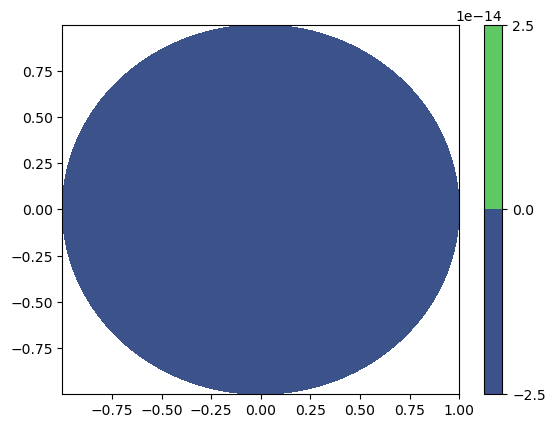

----- Transformed Coords -----


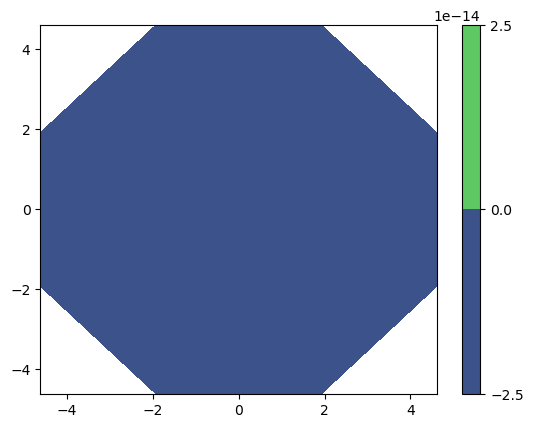

In [6]:
f = np.zeros_like(rho1000)

print('----- Unit Circle -----')
plotter(u1000,v1000,f)

print('----- Transformed Coords -----')
plotter(x1000,y1000,f)

### Zernike Polynomials

Link to Zernike Polynomial Pictures:

https://www.quickguide.org/post/a-simple-interpretation-of-zernike-polynomials

---------- n=0 ----------
----- n=0, m=0 -----


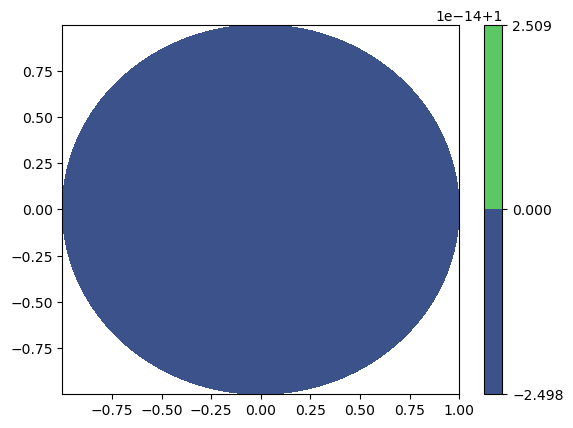

----- Total -----


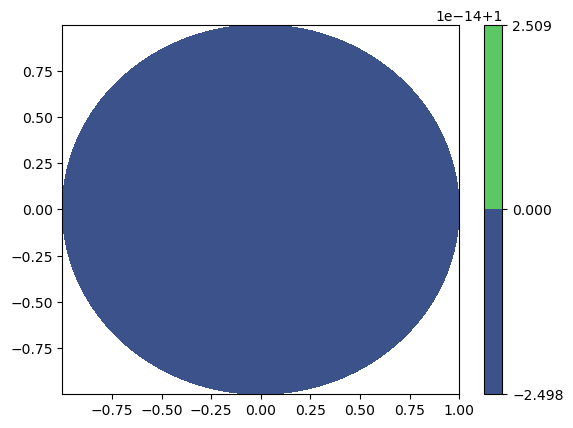

---------- n=1 ----------
----- n=1, m=-1 -----


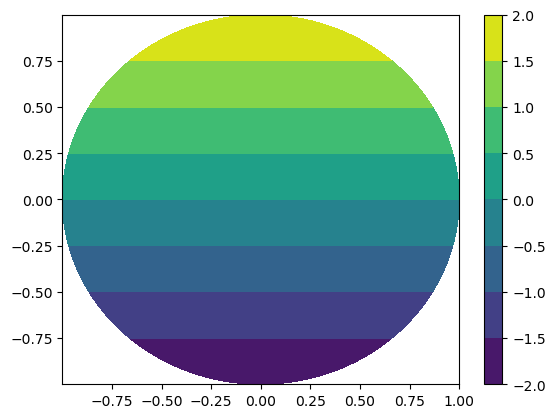

----- n=1, m=1 -----


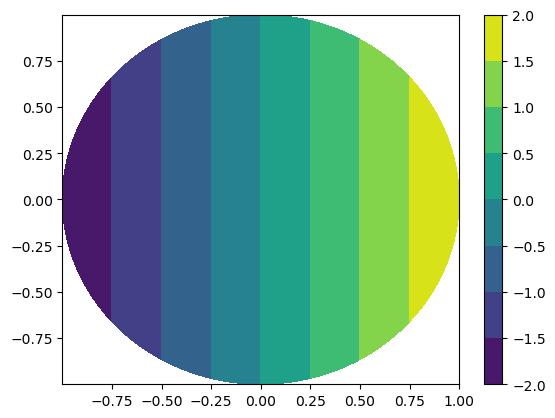

----- Total -----


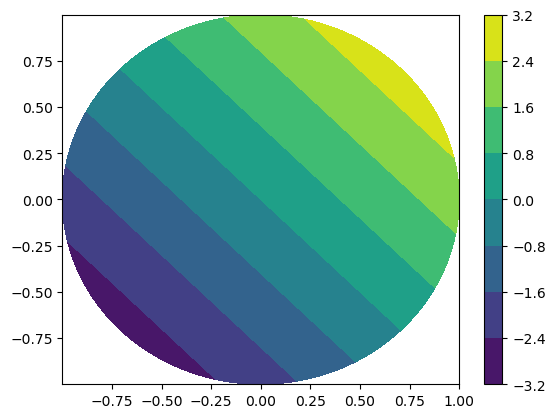

---------- n=2 ----------
----- n=2, m=-2 -----


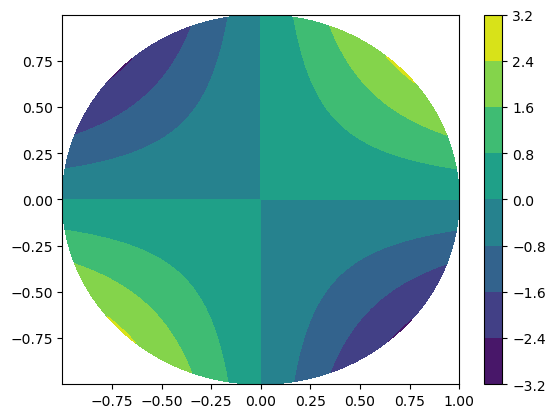

----- n=2, m=0 -----


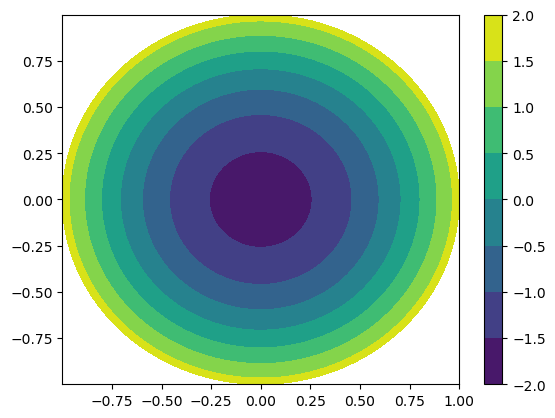

----- n=2, m=2 -----


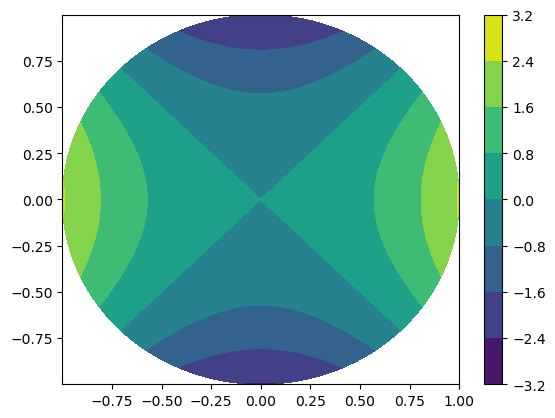

----- Total -----


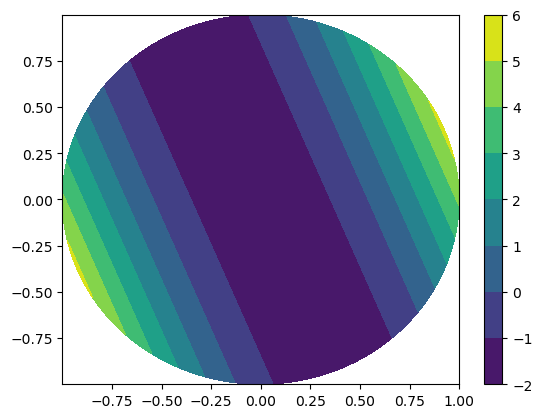

---------- n=3 ----------
----- n=3, m=-3 -----


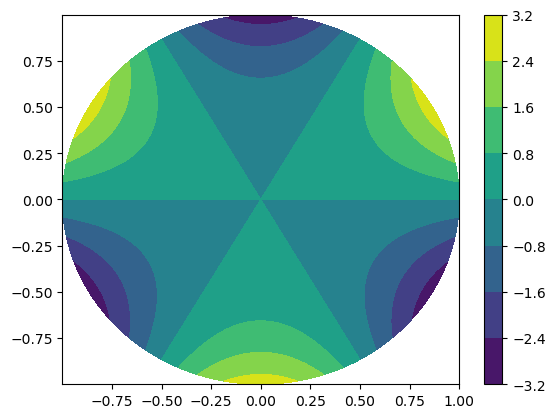

----- n=3, m=-1 -----


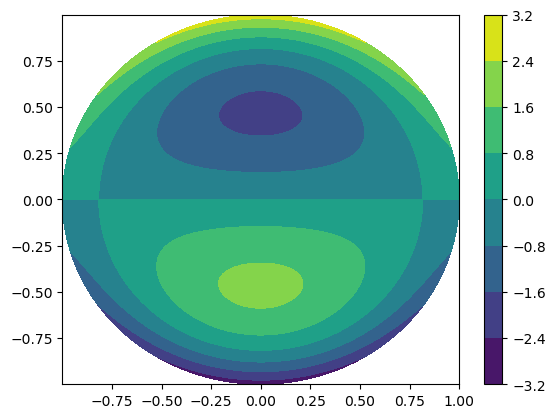

----- n=3, m=1 -----


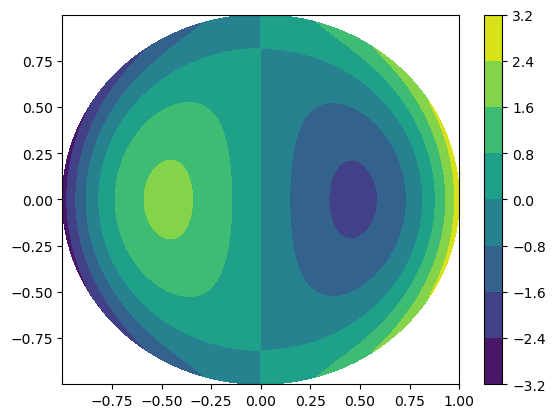

----- n=3, m=3 -----


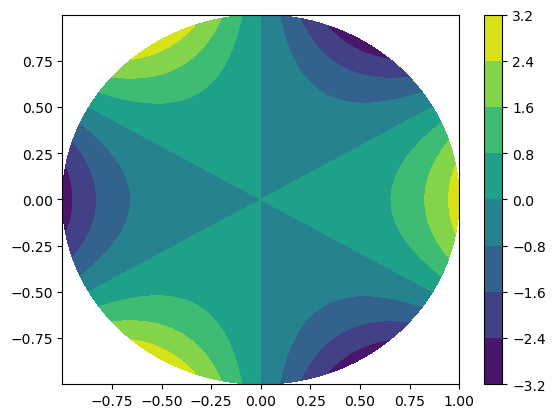

----- Total -----


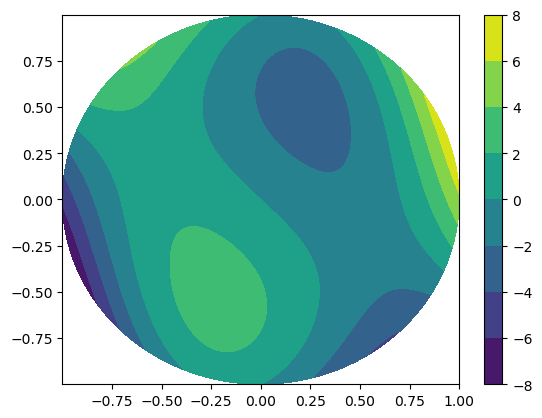

In [7]:
for n in range(4):
    ms = np.arange(-n,n+1,2)
    total = 0
    print('---------- n={} ----------'.format(n))
    for m in ms:
        f = zernike_m(n,m,**glip1000)
        print('----- n={}, m={} -----'.format(n,m))
        plotter(u1000,v1000,f)
        total += f
    print('----- Total -----')
    plotter(u1000,v1000,total)

# Integration Czechs

In [8]:
# differntial elements for visualiztion
drho = rho10[:,1]
_,drho = np.meshgrid(drho,drho)
dphi = phi10[1,1]

# output
print('----- r & dr -----')
display(rho10,drho)
print('\n----- phi & dphi -----')
display(phi10, dphi)

----- r & dr -----


array([[0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1],
       [0, 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667, 0.77778, 0.88889, 1]])

array([[0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111],
       [0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111, 0.11111]])


----- phi & dphi -----


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0.69813, 0.69813, 0.69813, 0.69813, 0.69813, 0.69813, 0.69813, 0.69813, 0.69813, 0.69813],
       [1.3963, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963, 1.3963],
       [2.0944, 2.0944, 2.0944, 2.0944, 2.0944, 2.0944, 2.0944, 2.0944, 2.0944, 2.0944],
       [2.7925, 2.7925, 2.7925, 2.7925, 2.7925, 2.7925, 2.7925, 2.7925, 2.7925, 2.7925],
       [3.4907, 3.4907, 3.4907, 3.4907, 3.4907, 3.4907, 3.4907, 3.4907, 3.4907, 3.4907],
       [4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.1888, 4.1888],
       [4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869, 4.8869],
       [5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851, 5.5851],
       [6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832, 6.2832]])

0.6981317007977318

In [9]:
# circle integration
drho = rho1000[:,1]
_,drho = np.meshgrid(drho,drho)
dphi = phi1000[1,1]

dmu = rho1000 * drho * dphi
np.sum(dmu)
#Should be pi, which is true

3.1478852762570315

In [10]:
# polygon integration
def polygon_area(p,R0): return p * R0**2 * cos(pi/p)**2 * tan(pi/p)

# differentials
dr = r1000[:,1]
_,dr = np.meshgrid(dr,dr)
dtheta = theta1000[1,1]

dmu = r1000 * dr * dtheta

# output
ana_area = polygon_area(8,5)
num_area = np.sum(dmu)
area_defect = ana_area - num_area

df = pd.DataFrame([ana_area,num_area,area_defect]).T
df.columns = ['Ana','Num','Defect']
df

,Ana,Num,Defect
0,70.710678,70.848628,-0.137949


# Transformation Functions

## Definitions

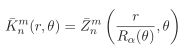

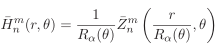

## Functions

In [11]:
def k_m(n,m,r,theta):
    phi = theta
    R = r_alpha(phi)
    rho = r / R

    K = zernike_m(n,m,rho,phi)
    return K

def h_m(n,m,r,theta):
    phi = theta
    R = r_alpha(phi)
    rho = r / R

    H = zernike_m(n,m,rho,phi) / R
    return H

## Integration Check

Measure by which K is orthonormal:
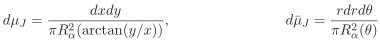

Measure by which H is orthonormal:
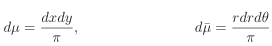

In [12]:
def integrate_k(k1,k2,r,theta):
    R = r_alpha(theta)
    
    dr = r[:,1]
    _,dr = np.meshgrid(dr,dr)
    dtheta = theta[1,1]

    dmu = r * dr * dtheta / R**2 / pi
    return np.sum(k1 * k2 * dmu)

def integrate_h(h1,h2,r,theta):
    R = r_alpha(theta)
    
    dr = r[:,1]
    _,dr = np.meshgrid(dr,dr)
    dtheta = theta[1,1]

    dmu = r * dr * dtheta / pi
    return np.sum(h1 * h2 * dmu)

In [52]:
# checking orthonormality of K
r,theta = gen_rtheta(**glip1000)

k1 = k_m(1,1,r,theta)
k2 = k_m(1,-1,r,theta)

integrate_k(k1,k2,r,theta), integrate_k(k1,k1,r,theta)

(1.0588473825860303e-16, 1.0040090160250357)

In [14]:
# checking orthonormality of H
r,theta = gen_rtheta(**glip1000)

h1 = h_m(1,1,r,theta)
h2 = h_m(1,-1,r,theta)

integrate_h(h1,h2,r,theta), integrate_h(h1,h1,r,theta)

(1.0588473825860303e-16, 1.004009016025036)

## Plotting K and H

---------- n=0 ----------
----- K n=0, m=0 -----


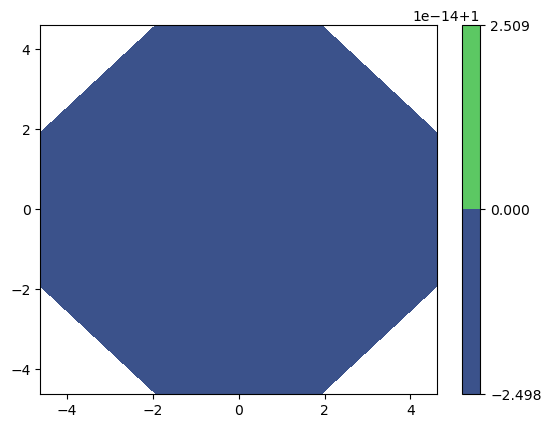

----- Total -----


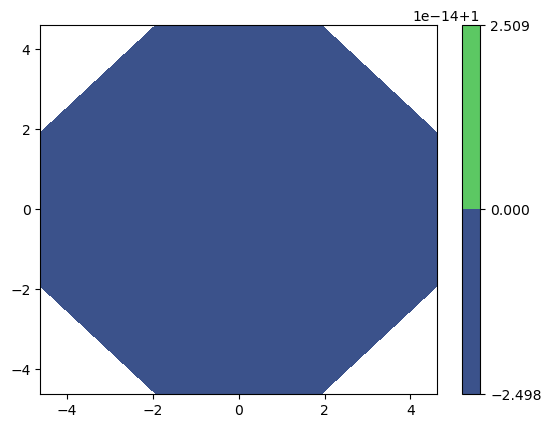

---------- n=1 ----------
----- K n=1, m=-1 -----


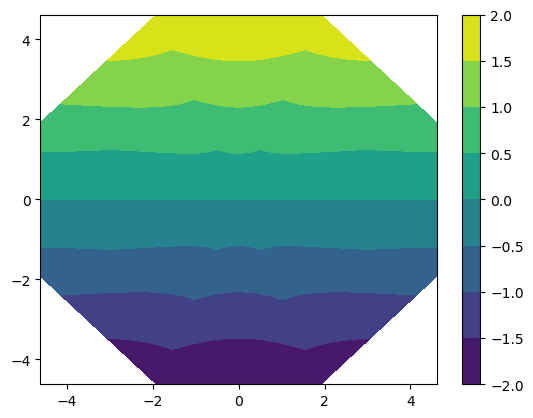

----- K n=1, m=1 -----


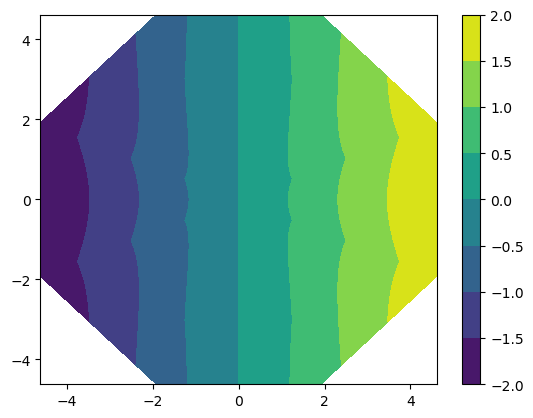

----- Total -----


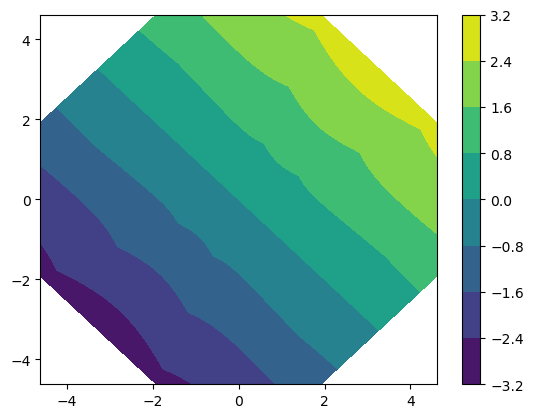

---------- n=2 ----------
----- K n=2, m=-2 -----


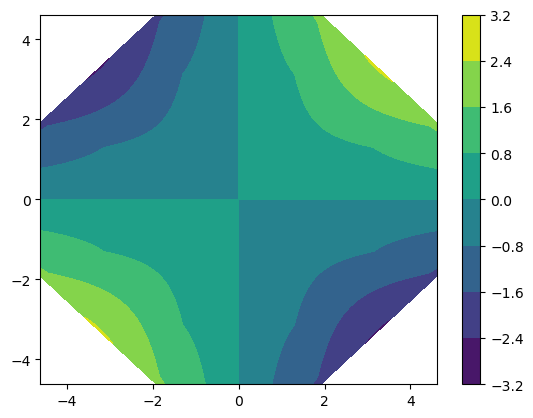

----- K n=2, m=0 -----


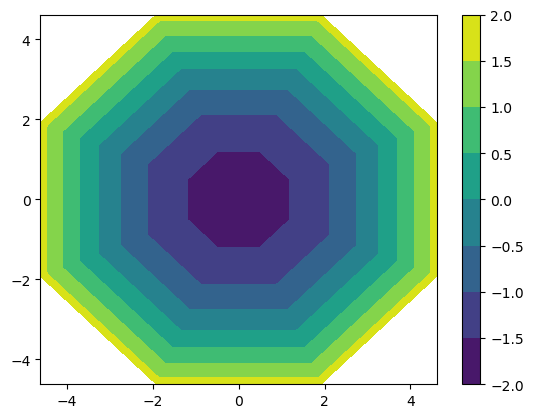

----- K n=2, m=2 -----


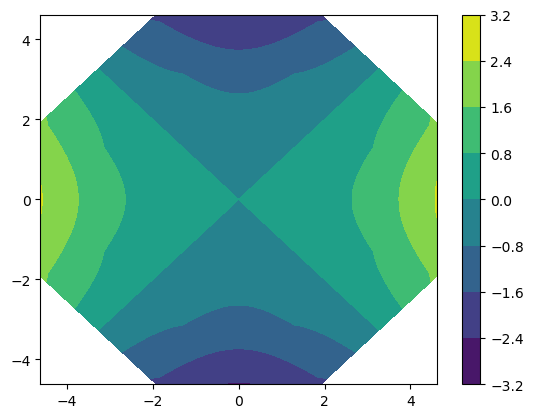

----- Total -----


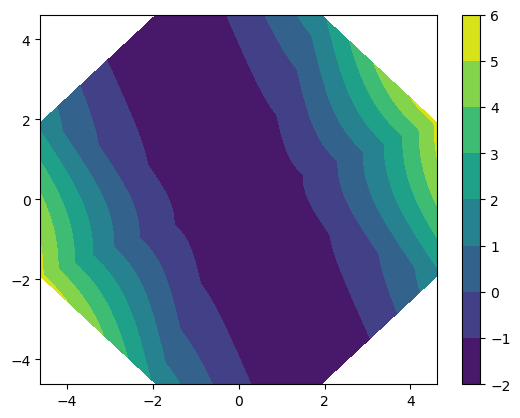

---------- n=3 ----------
----- K n=3, m=-3 -----


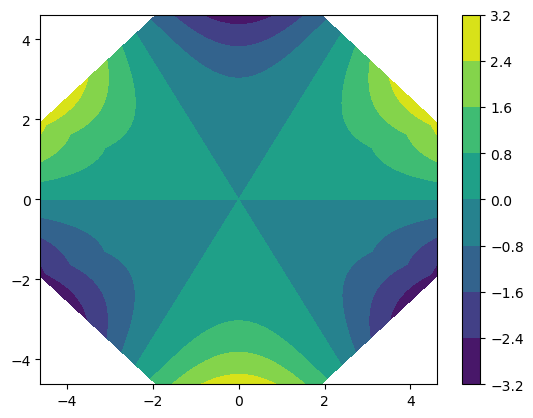

----- K n=3, m=-1 -----


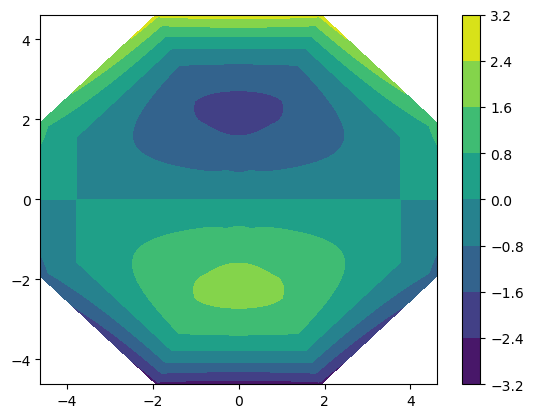

----- K n=3, m=1 -----


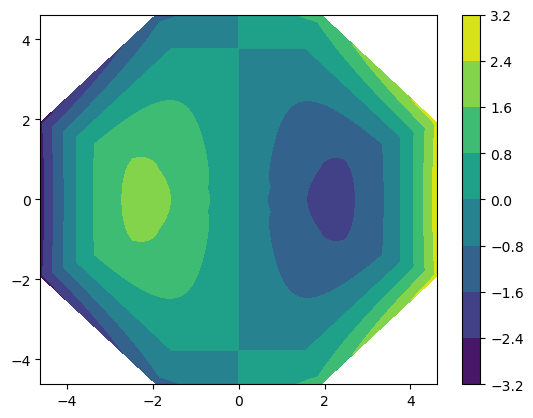

----- K n=3, m=3 -----


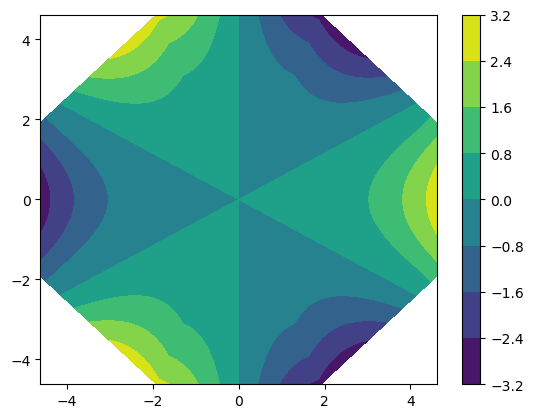

----- Total -----


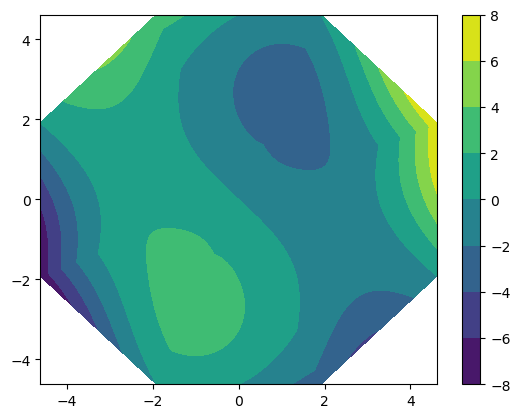

---------- n=4 ----------
----- K n=4, m=-4 -----


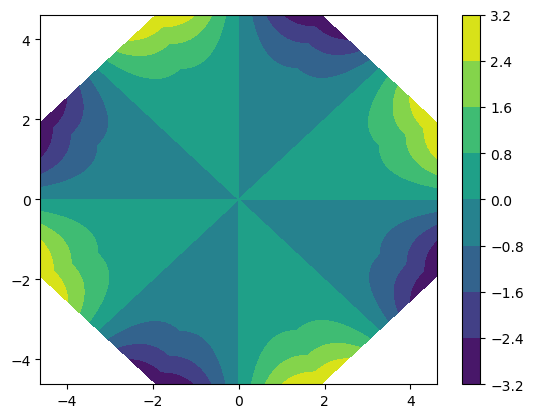

----- K n=4, m=-2 -----


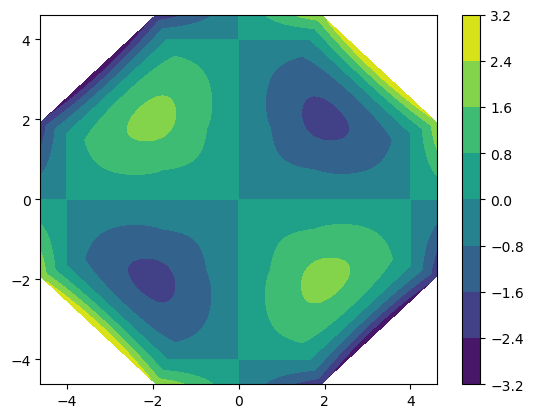

----- K n=4, m=0 -----


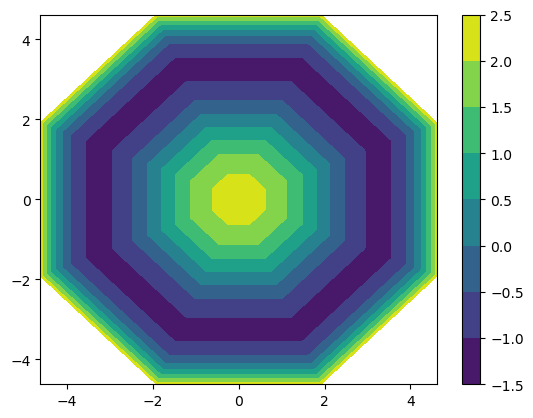

----- K n=4, m=2 -----


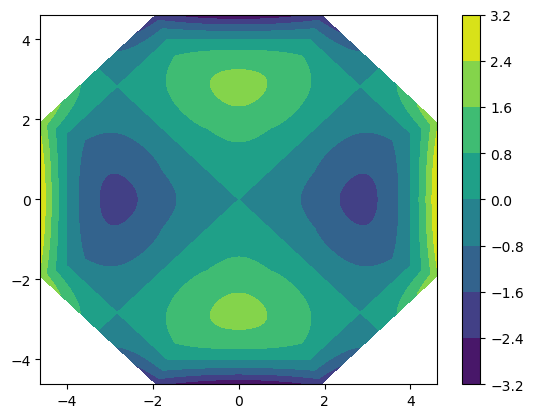

----- K n=4, m=4 -----


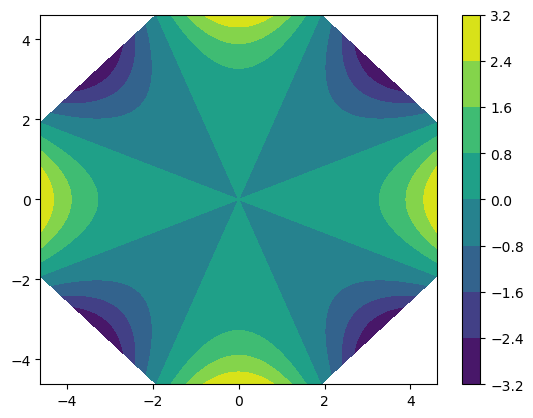

----- Total -----


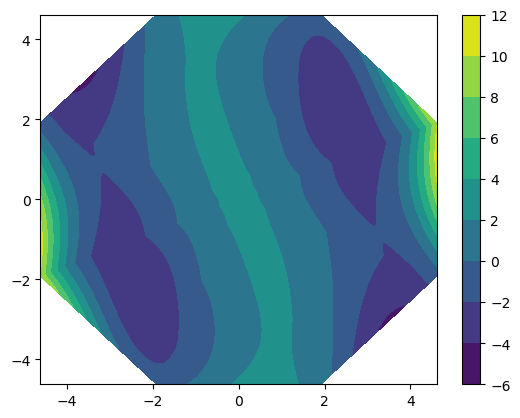

---------- n=5 ----------
----- K n=5, m=-5 -----


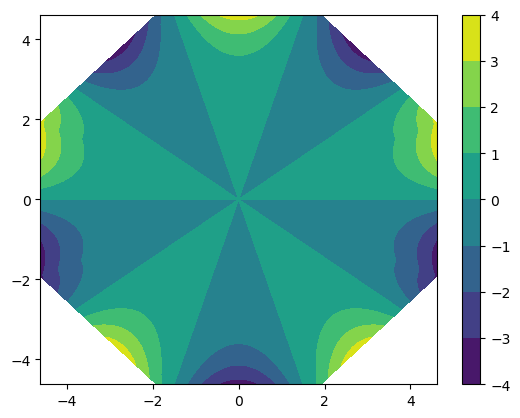

----- K n=5, m=-3 -----


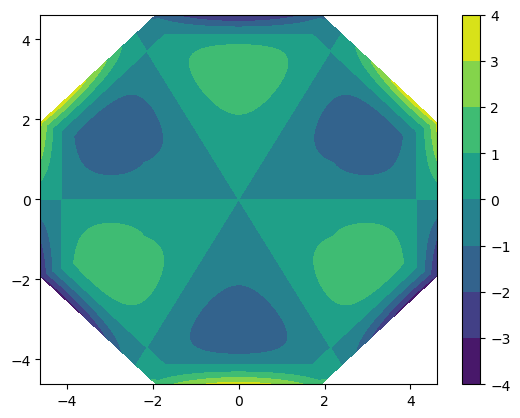

----- K n=5, m=-1 -----


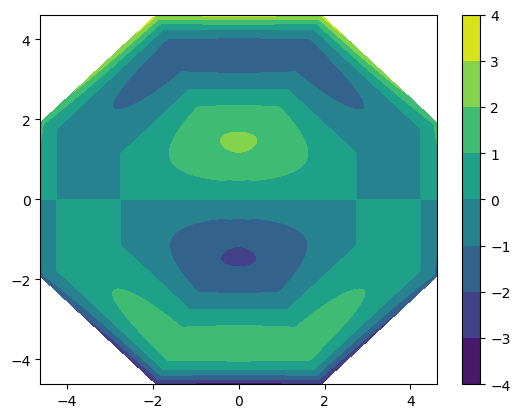

----- K n=5, m=1 -----


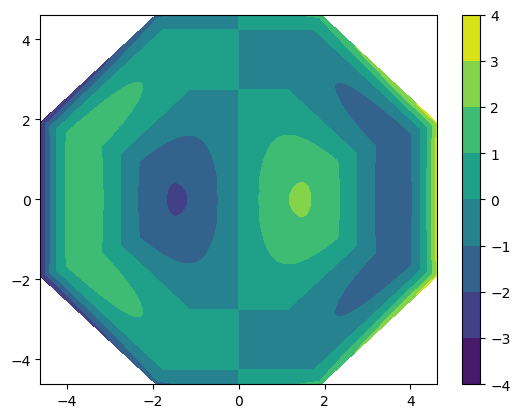

----- K n=5, m=3 -----


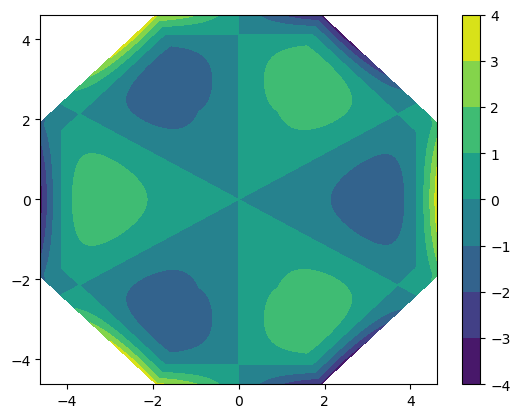

----- K n=5, m=5 -----


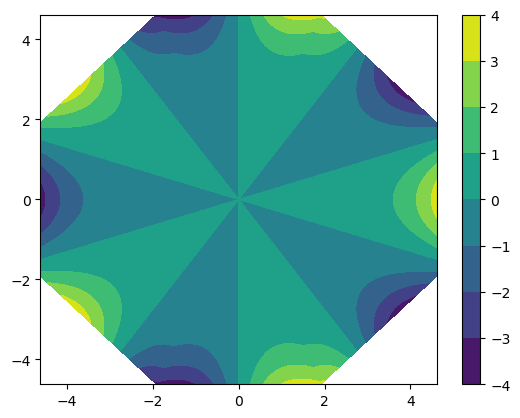

----- Total -----


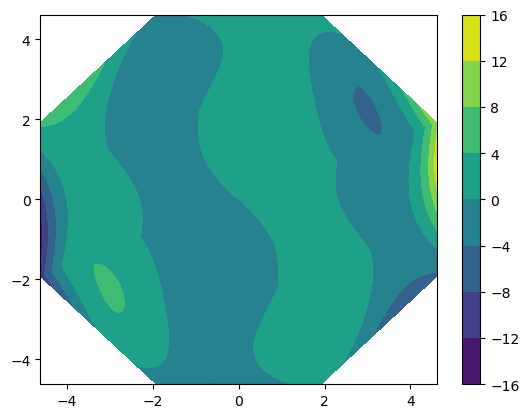

In [58]:
# plotting K
for n in range(6):
    ms = np.arange(-n,n+1,2)
    ktotal = 0
    print('---------- n={} ----------'.format(n))
    for m in ms:
        k1 = k_m(n,m,r1000,theta1000)
        print('----- K n={}, m={} -----'.format(n,m))
        plotter(x1000,y1000,k1)
        ktotal += k1
    print('----- Total -----')
    plotter(x1000,y1000,ktotal)

---------- n=0 ----------
----- H n=0, m=0 -----


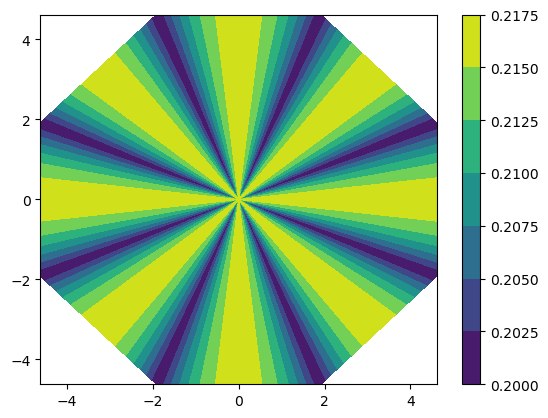

----- Total -----


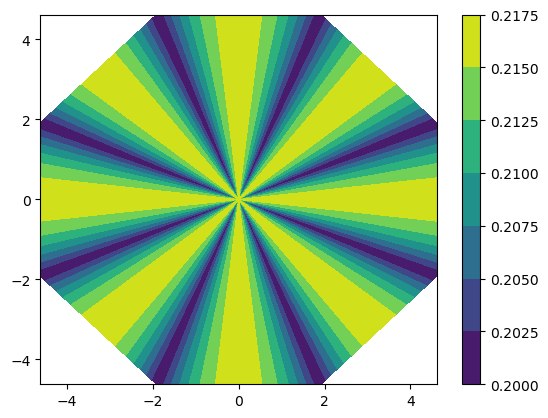

---------- n=1 ----------
----- H n=1, m=-1 -----


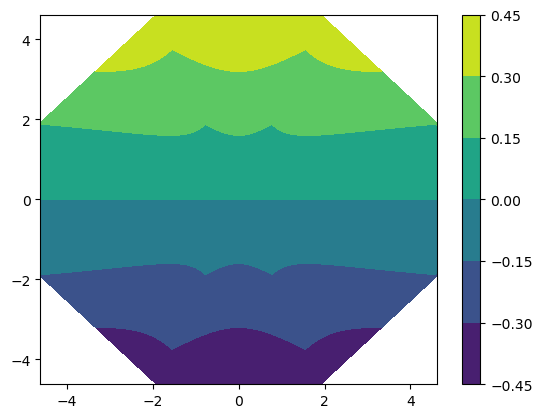

----- H n=1, m=1 -----


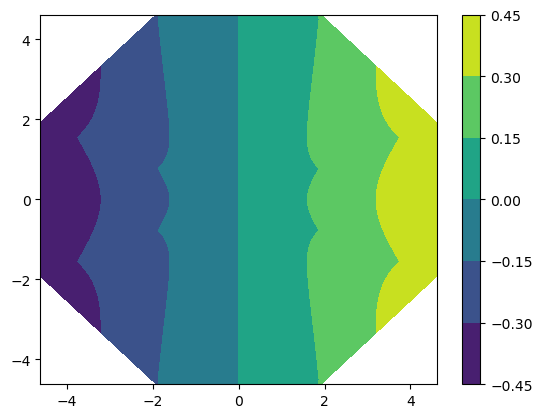

----- Total -----


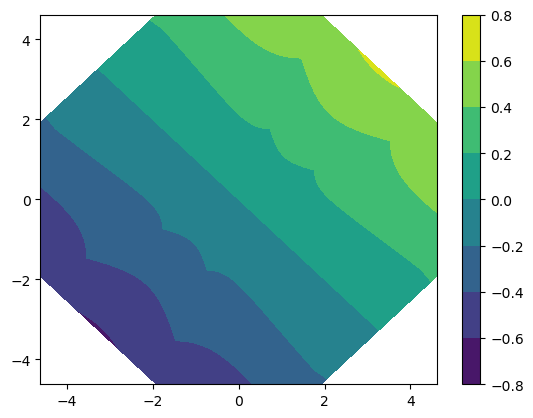

---------- n=2 ----------
----- H n=2, m=-2 -----


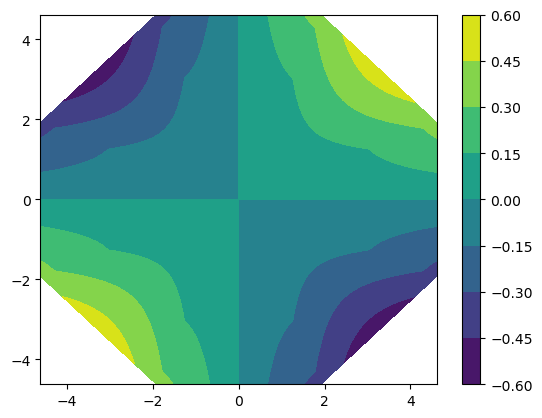

----- H n=2, m=0 -----


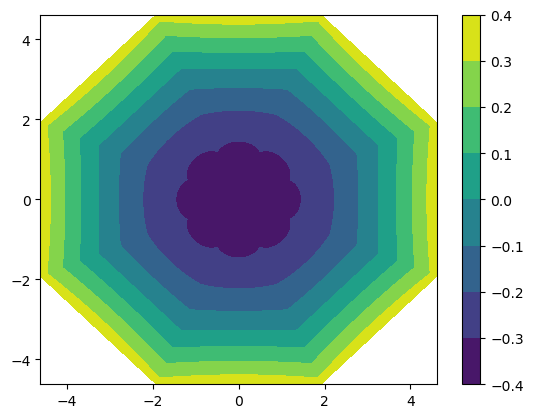

----- H n=2, m=2 -----


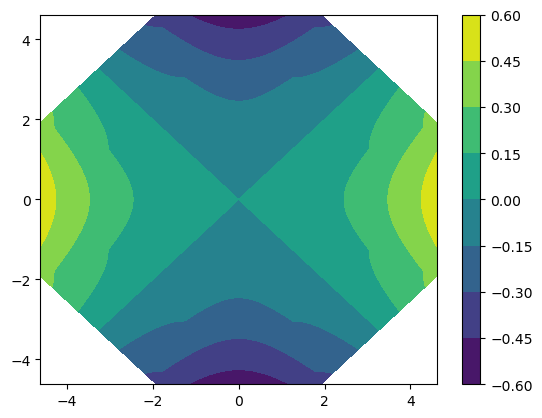

----- Total -----


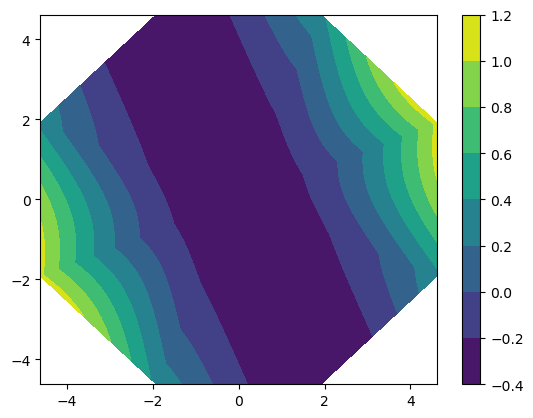

---------- n=3 ----------
----- H n=3, m=-3 -----


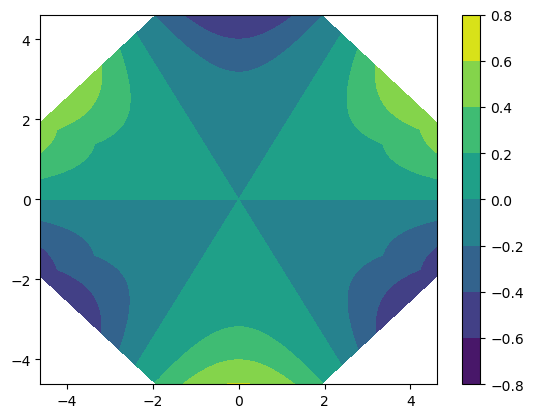

----- H n=3, m=-1 -----


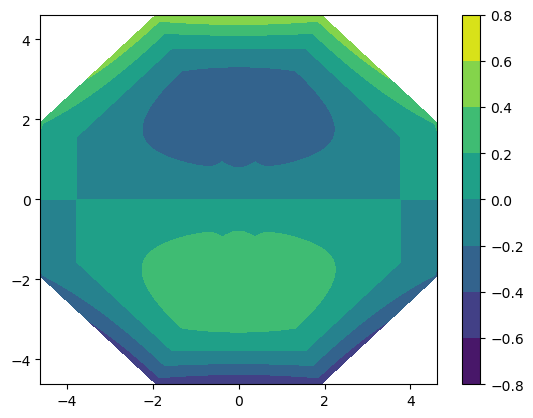

----- H n=3, m=1 -----


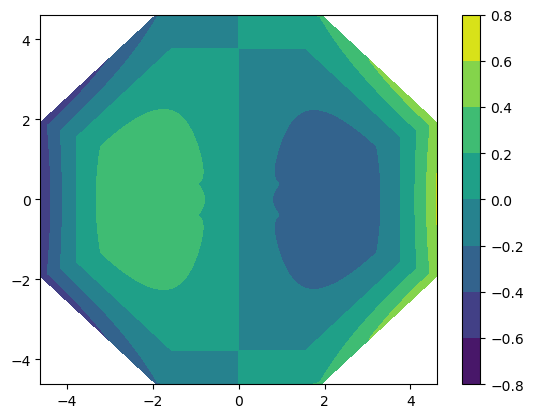

----- H n=3, m=3 -----


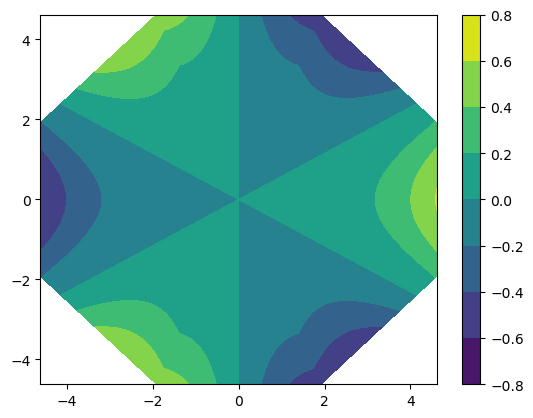

----- Total -----


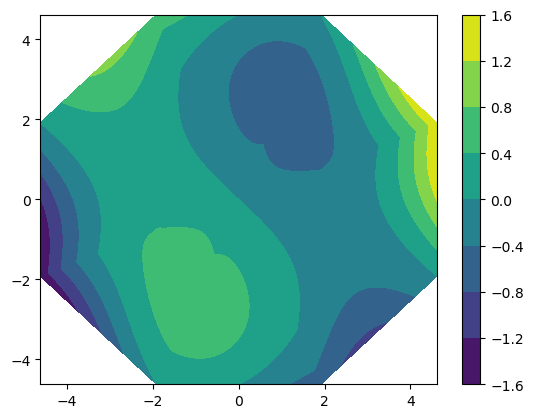

In [16]:
# plotting H
for n in range(4):
    ms = np.arange(-n,n+1,2)
    htotal = 0
    print('---------- n={} ----------'.format(n))
    for m in ms:
        h1 = h_m(n,m,r1000,theta1000)
        print('----- H n={}, m={} -----'.format(n,m))
        plotter(x1000,y1000,h1)
        htotal += h1
    print('----- Total -----')
    plotter(x1000,y1000,htotal)

## Weighting Factor

In [17]:
def input_function(x,y):
    return 2*x**2 - y**2 + x**2*y - 4*x*y**2 + 5*x*y - 3*x + 5*y

### K

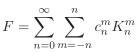

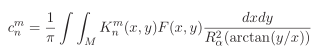

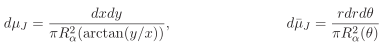

It can be seen that c is the integral of K and F over dmu

In [18]:
def ck(n,m,r,theta):
    x = r * cos(theta)
    y = r * sin(theta)

    F = input_function(x,y)
    K = k_m(n,m,r,theta)

    #Integration Parameters
    R = r_alpha(theta)
    
    dr = r[:,1]
    _,dr = np.meshgrid(dr,dr)
    dtheta = theta[1,1]

    dmu = r * dr * dtheta / R**2 / pi

    return np.sum(K * F * dmu)

### H

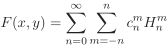

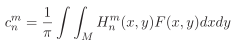

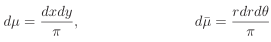

It can be seen that c is the integral of H and F over dmu

In [19]:
def ch(n,m,r,theta):
    x = r * cos(theta)
    y = r * sin(theta)

    F = input_function(x,y)
    H = h_m(n,m,r,theta)

    #Integration Parameters
    R = r_alpha(theta)
    
    dr = r[:,1]
    _,dr = np.meshgrid(dr,dr)
    dtheta = theta[1,1]

    dmu = r * dr * dtheta / pi

    return np.sum(H * F * dmu)

## Basis Functions

### K

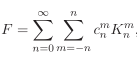

In [20]:
def fk_m(n,m,r,theta):
    c = ck(n,m,r,theta)
    K = k_m(n,m,r,theta)
    return c*K

def fk_n(n,r,theta):
    ms = np.arange(-n,n+1,2)
    F = 0
    for m in ms:
        F += fk_m(n,m,r,theta)
    return F

def fk(n,r,theta):
    F = 0
    for i in range(n+1):
        F += fk_n(i,r,theta)
    return F

### H

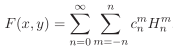

In [21]:
def fh_m(n,m,r,theta):
    c = ch(n,m,r,theta)
    H = h_m(n,m,r,theta)
    return c*H

def fh_n(n,r,theta):
    ms = np.arange(-n,n+1,2)
    F = 0
    for m in ms:
        F += fh_m(n,m,r,theta)
    return F

def fh(n,r,theta):
    F = 0
    for i in range(n+1):
        F += fh_n(i,r,theta)
    return F

# Graphical Comparision

## K vs Analytical

----- Analytical -----


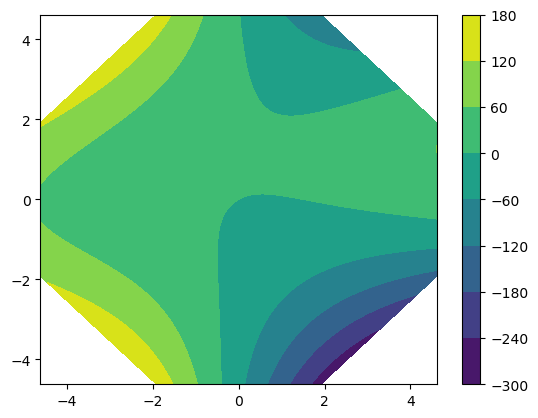

----- Approx 0 -----


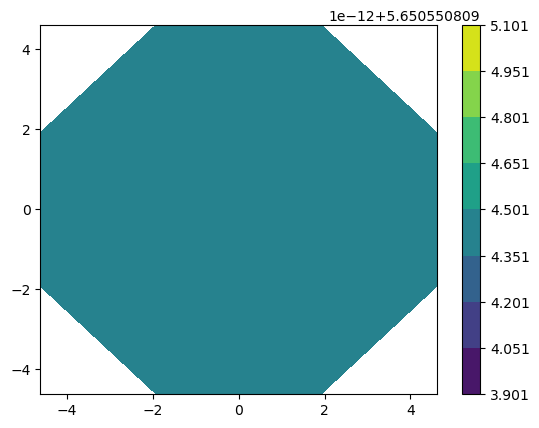

----- Defect 0 -----


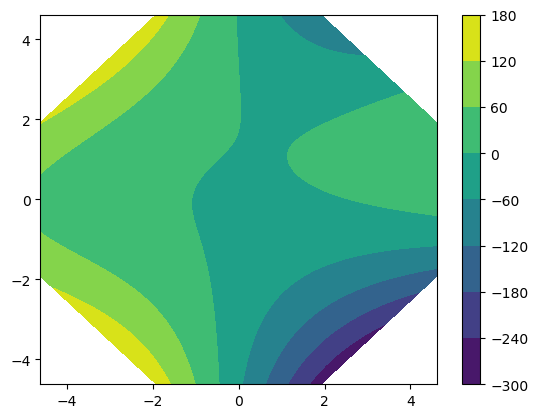

----- Approx 1 -----


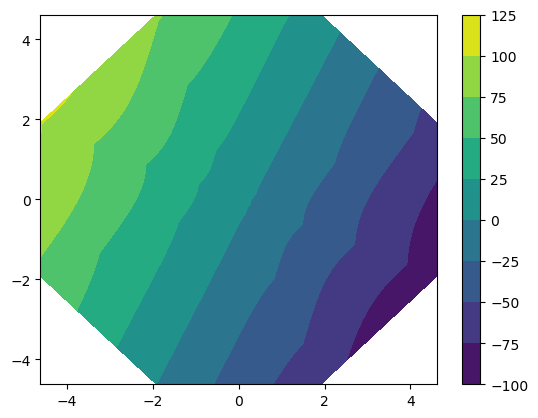

----- Defect 1 -----


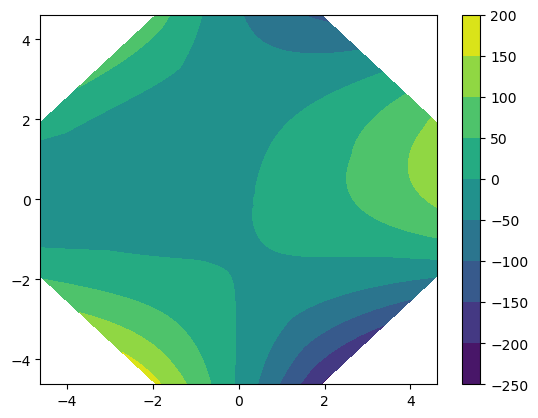

----- Approx 2 -----


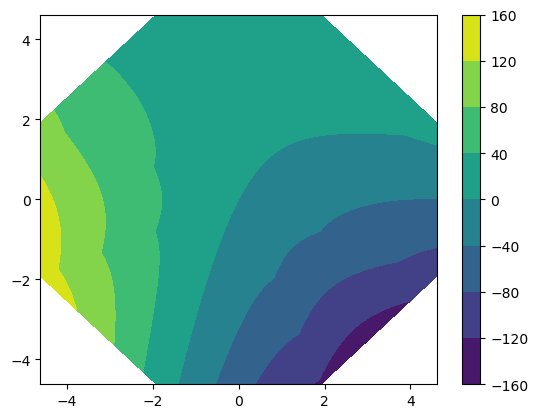

----- Defect 2 -----


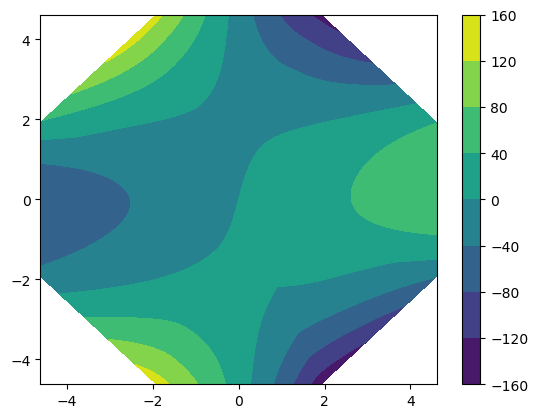

----- Approx 3 -----


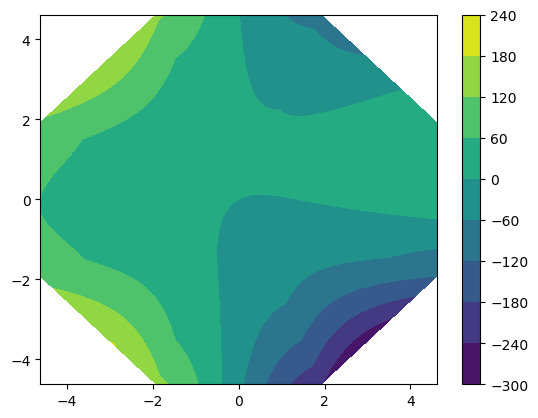

----- Defect 3 -----


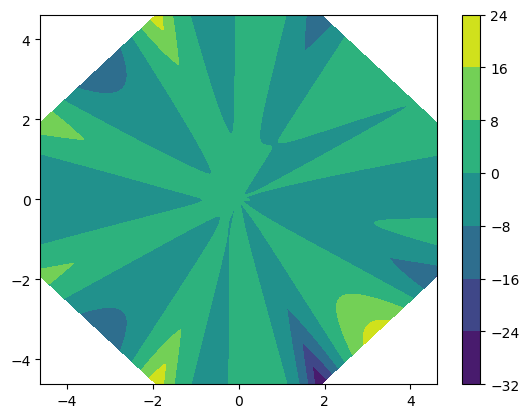

----- Approx 4 -----


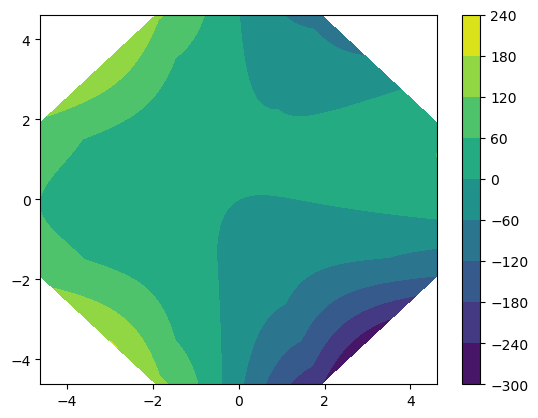

----- Defect 4 -----


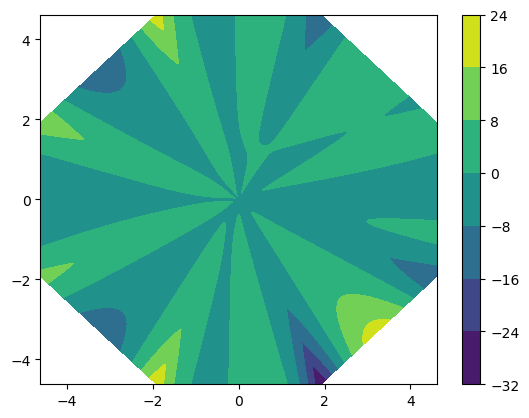

----- Approx 5 -----


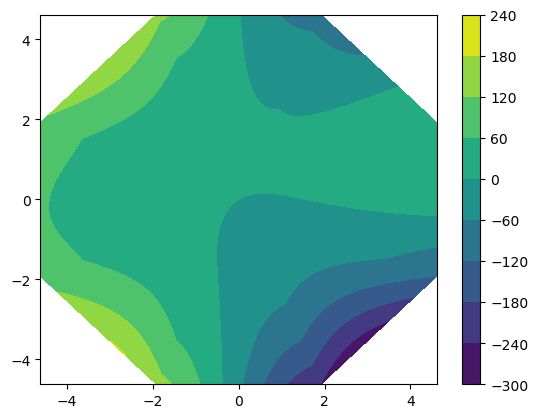

----- Defect 5 -----


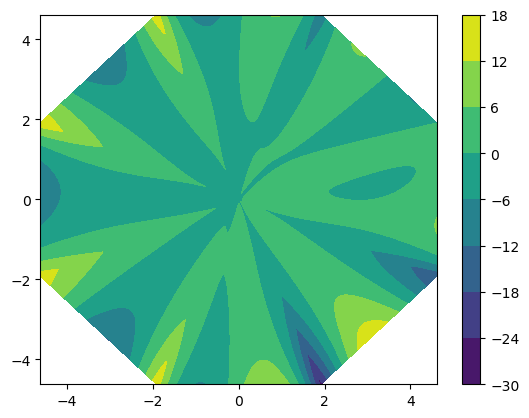

----- Approx 6 -----


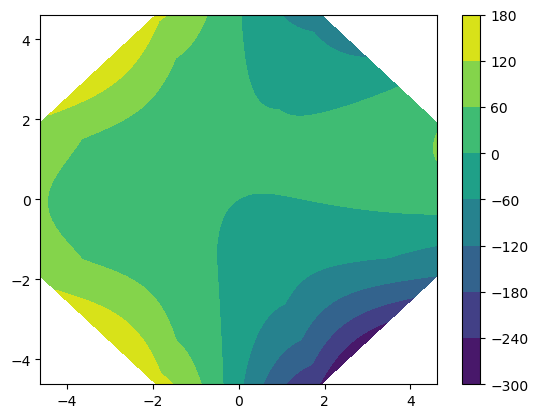

----- Defect 6 -----


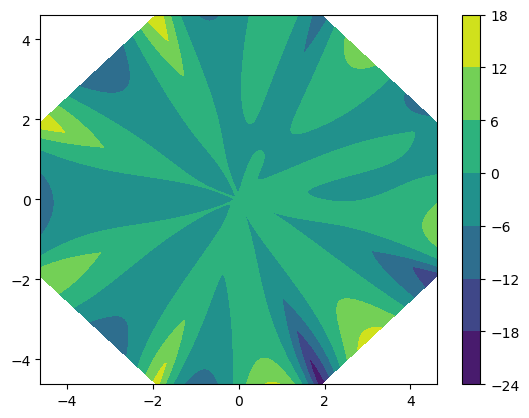

----- Approx 7 -----


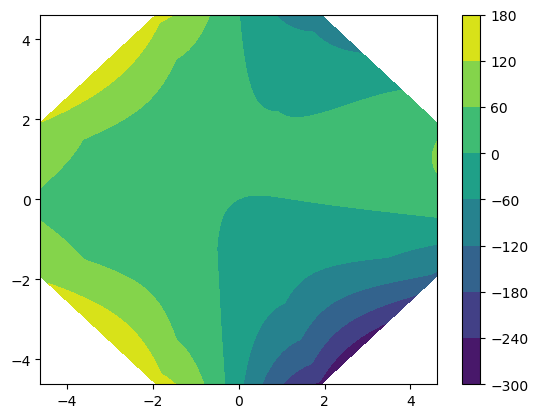

----- Defect 7 -----


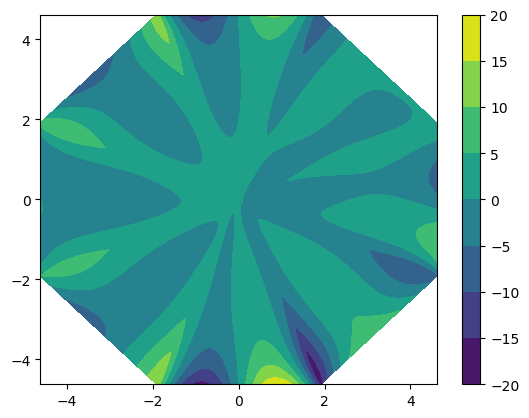

----- Approx 8 -----


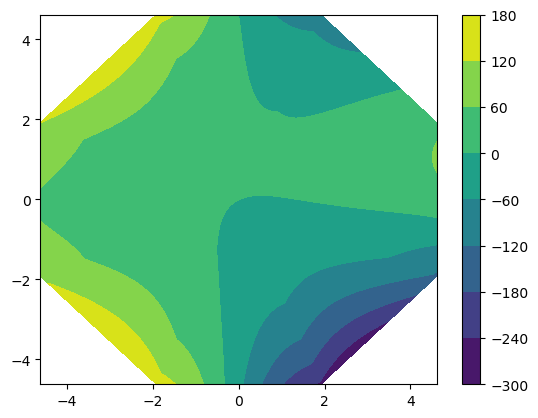

----- Defect 8 -----


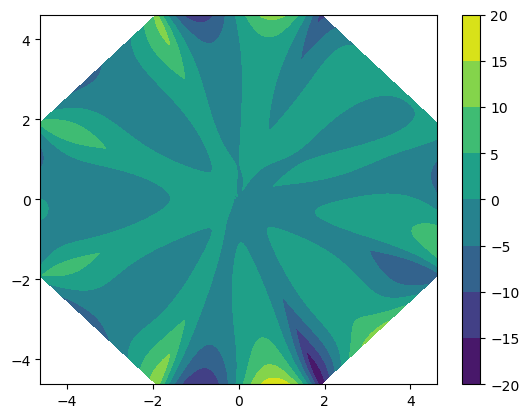

----- Approx 9 -----


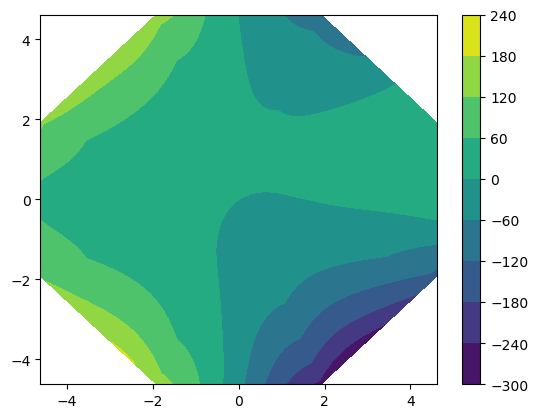

----- Defect 9 -----


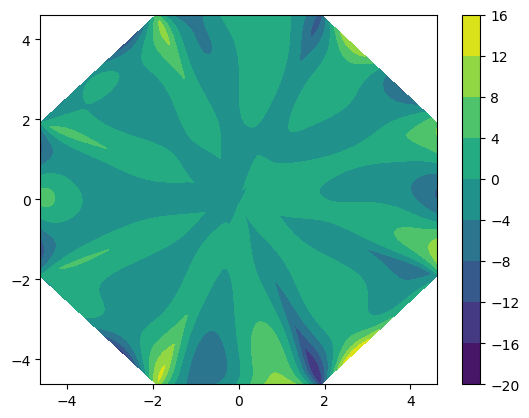

----- Approx 10 -----


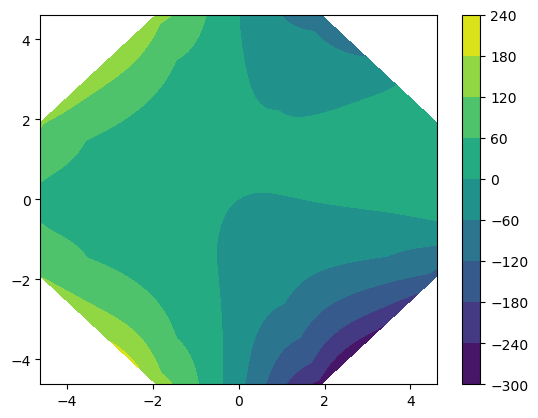

----- Defect 10 -----


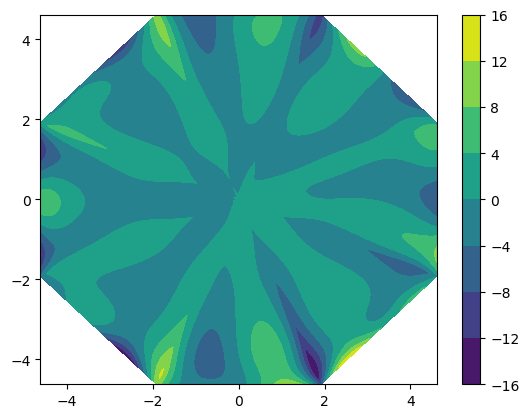

----- Approx 11 -----


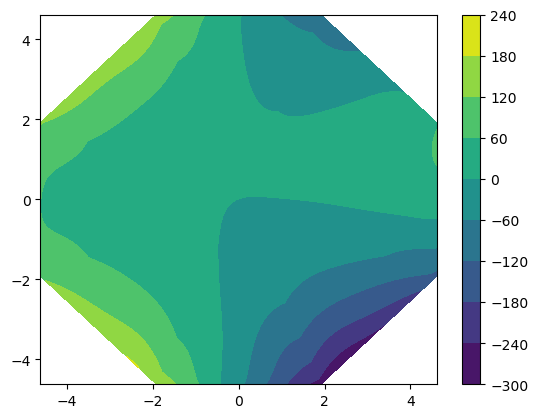

----- Defect 11 -----


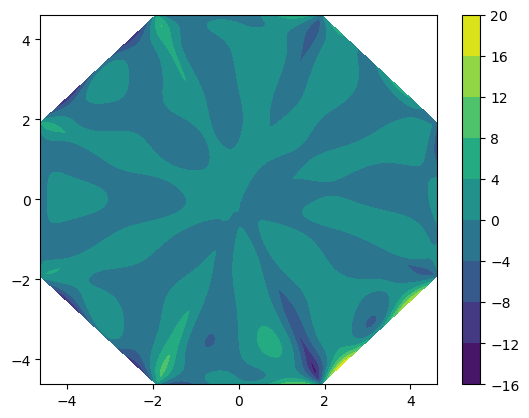

----- Approx 12 -----


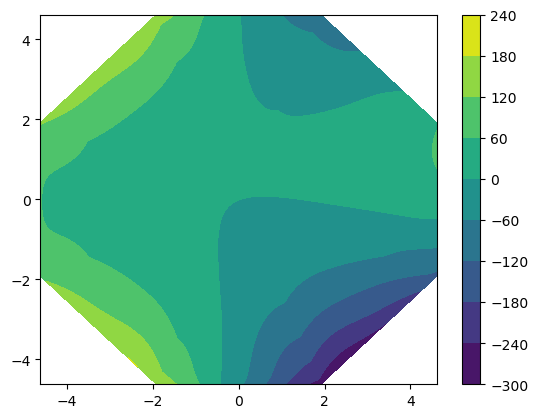

----- Defect 12 -----


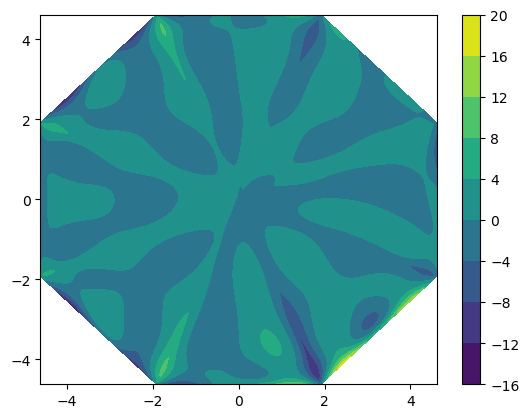

----- Approx 13 -----


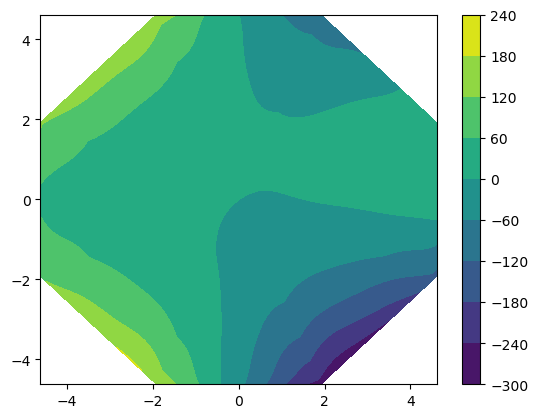

----- Defect 13 -----


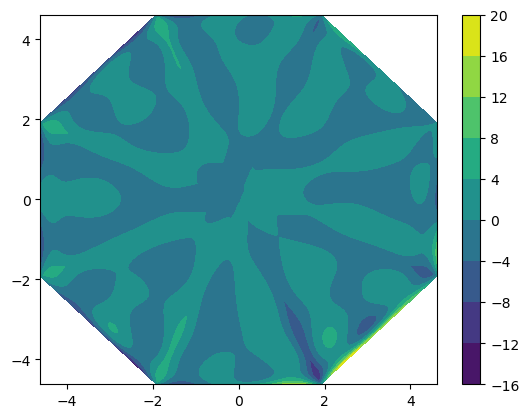

----- Approx 14 -----


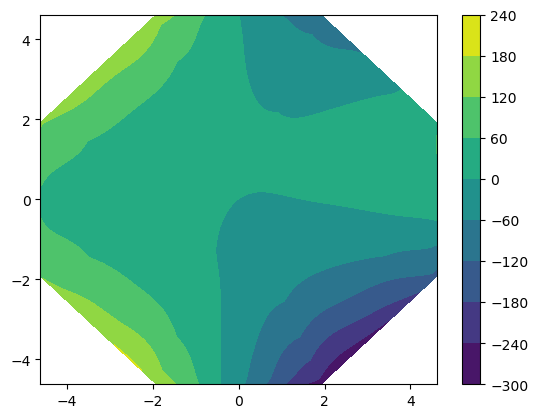

----- Defect 14 -----


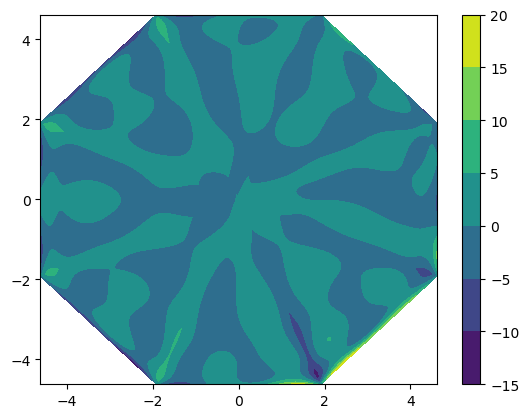

----- Approx 15 -----


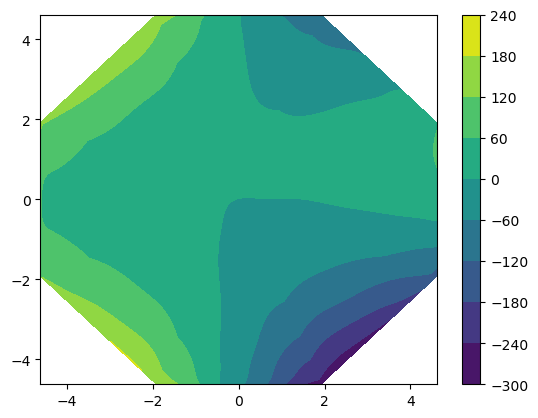

----- Defect 15 -----


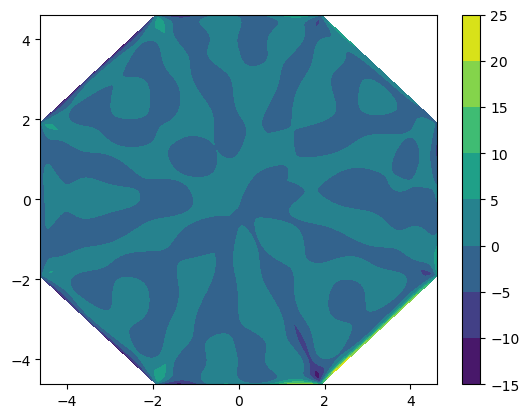

----- Approx 16 -----


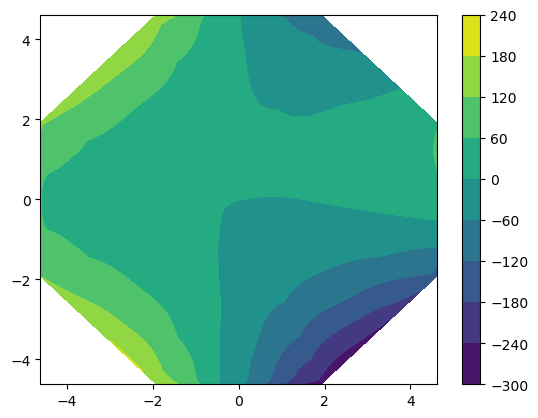

----- Defect 16 -----


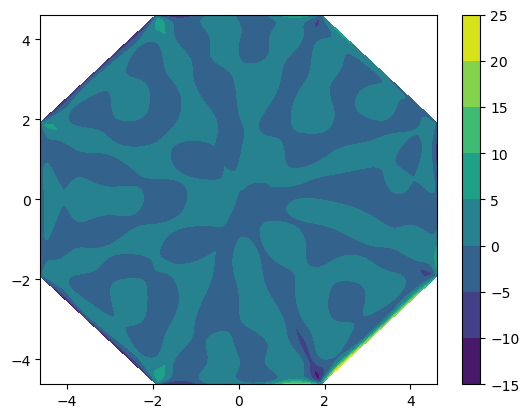

----- Approx 17 -----


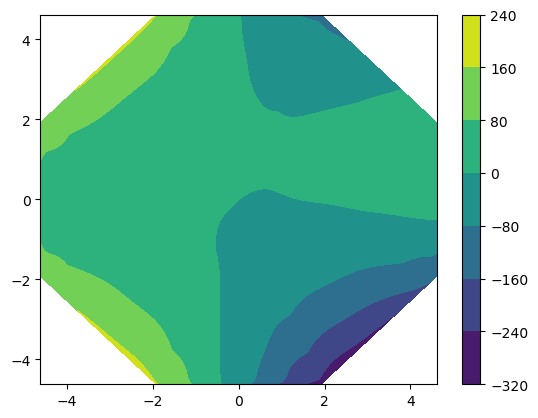

----- Defect 17 -----


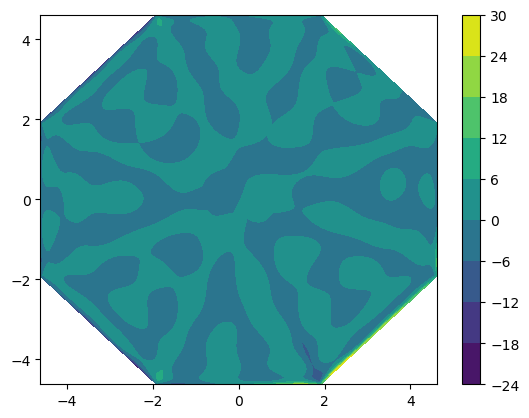

----- Approx 18 -----


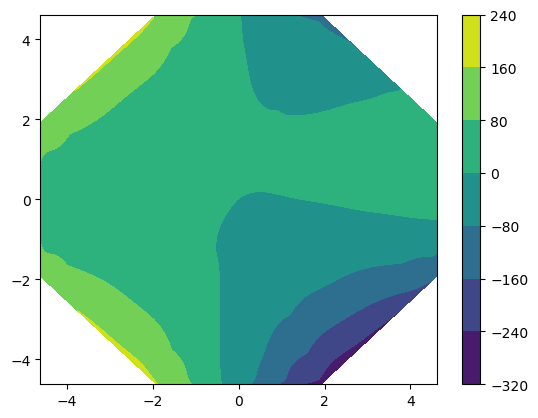

----- Defect 18 -----


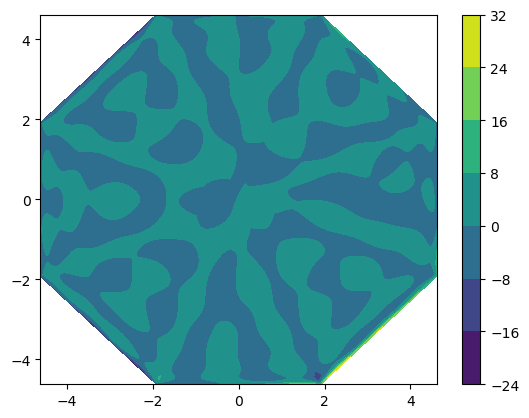

----- Approx 19 -----


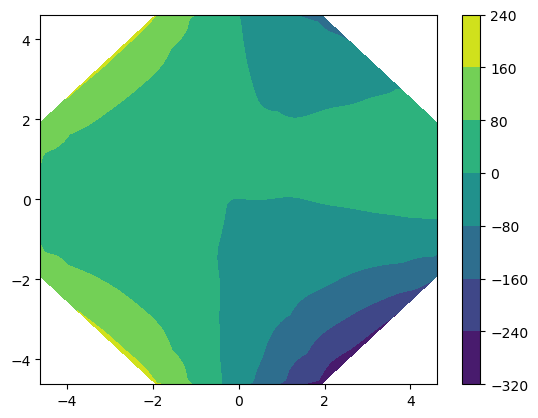

----- Defect 19 -----


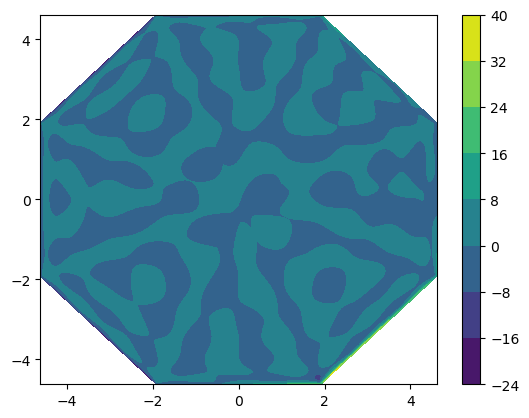

----- Approx 20 -----


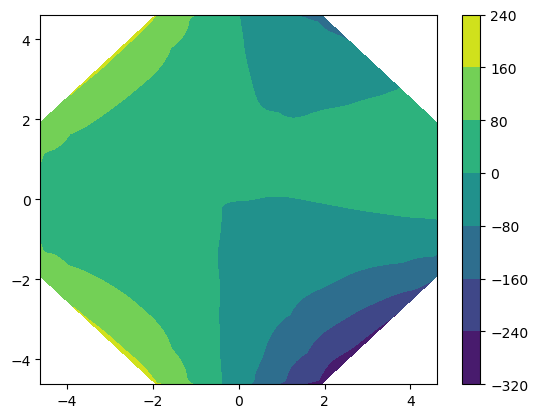

----- Defect 20 -----


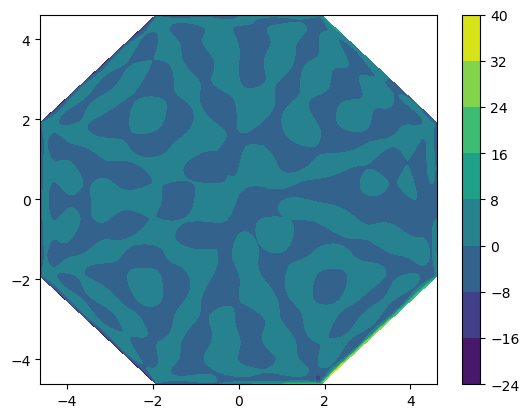

In [22]:
F1 = input_function(x1000,y1000)
F2 = 0

print('----- Analytical -----')
plotter(x1000,y1000,F1)

for n in range(21):
    # approximation of f
    F2 += fk_n(n,r1000,theta1000)
    print('----- Approx {} -----'.format(n))
    plotter(x1000,y1000,F2)

    # defect b/w analytical and approximation
    F3 = F1 - F2
    # plotting
    print('----- Defect {} -----'.format(n))
    plotter(x1000,y1000,F3)

## H vs Analytical

----- Analytical -----


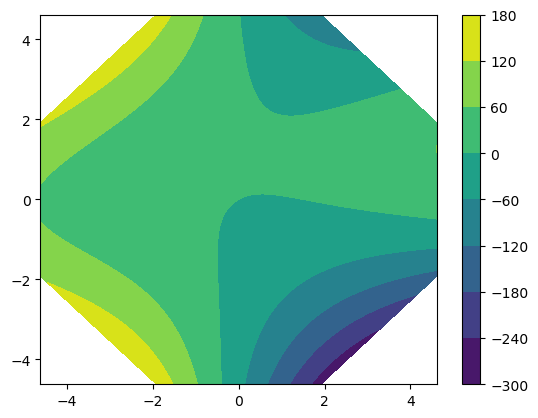

----- Approx 0 -----


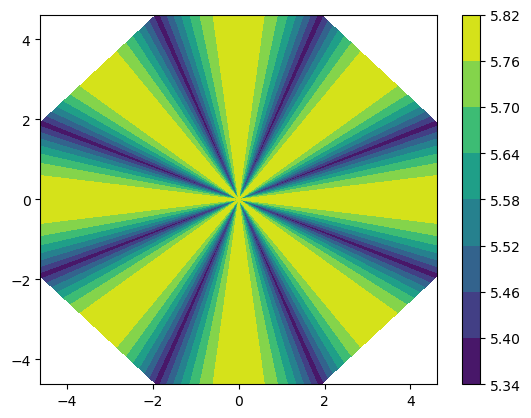

----- Defect 0 -----


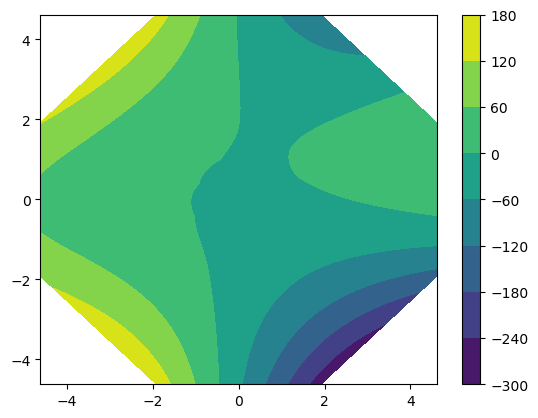

----- Approx 1 -----


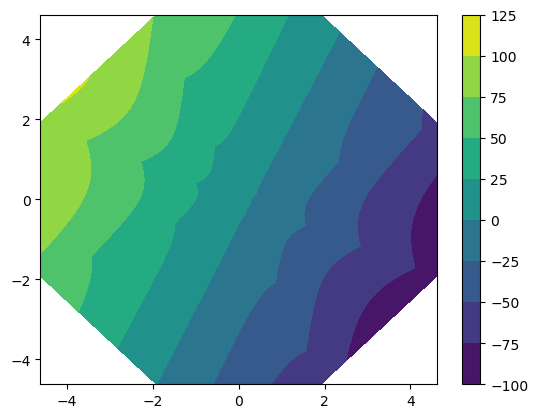

----- Defect 1 -----


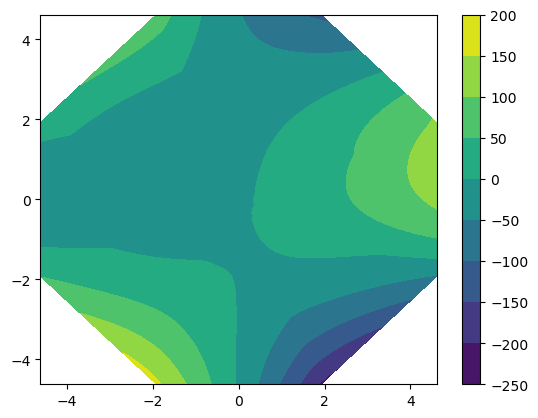

----- Approx 2 -----


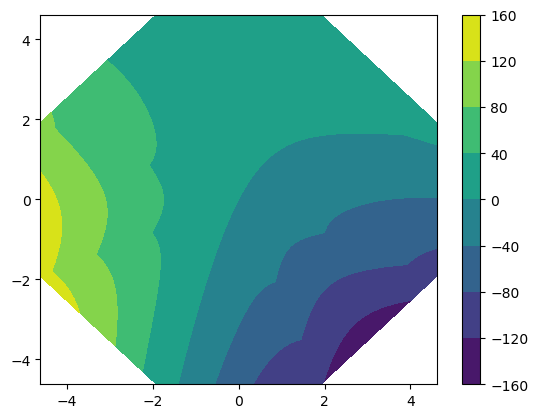

----- Defect 2 -----


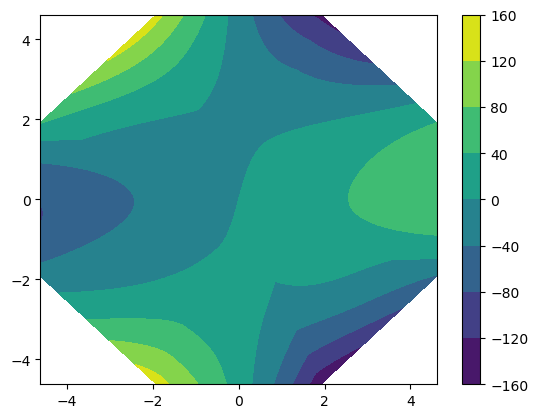

----- Approx 3 -----


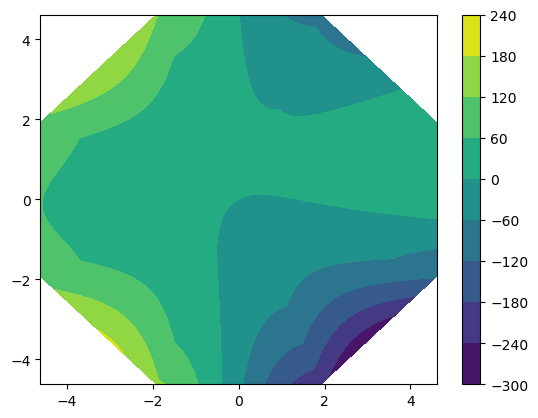

----- Defect 3 -----


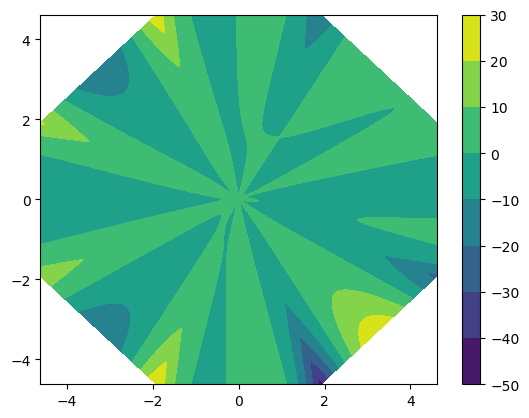

----- Approx 4 -----


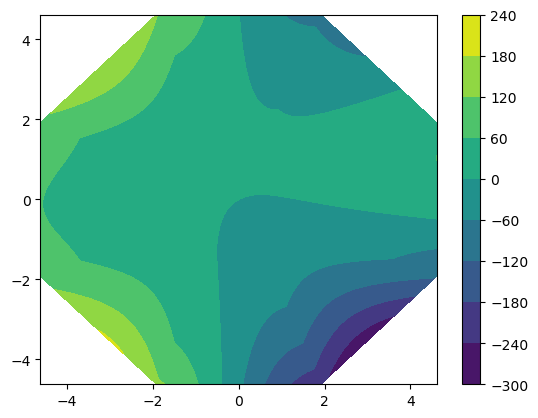

----- Defect 4 -----


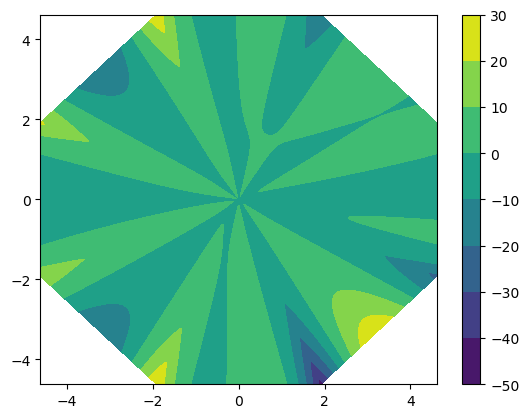

----- Approx 5 -----


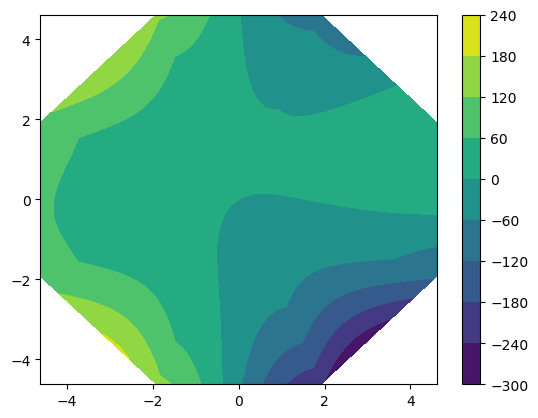

----- Defect 5 -----


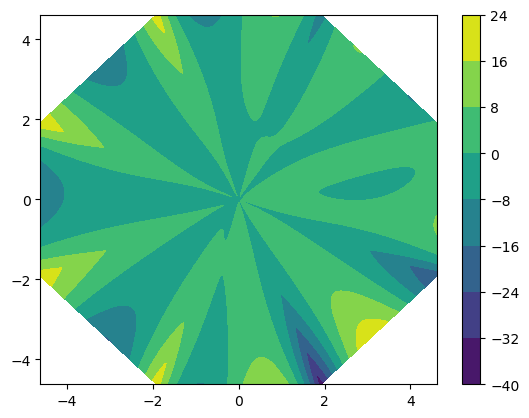

----- Approx 6 -----


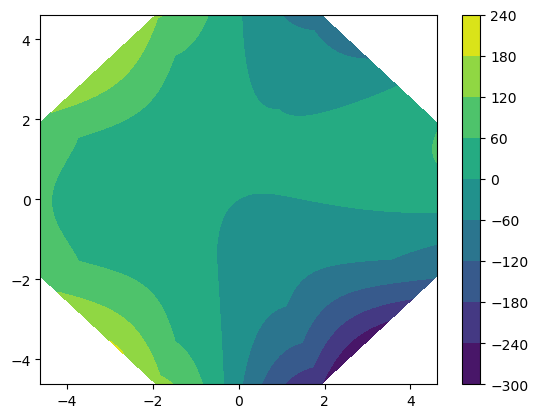

----- Defect 6 -----


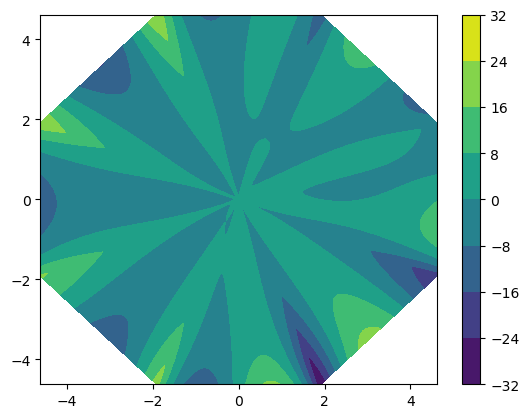

----- Approx 7 -----


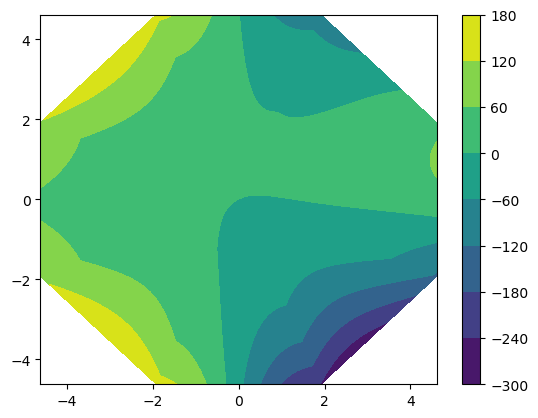

----- Defect 7 -----


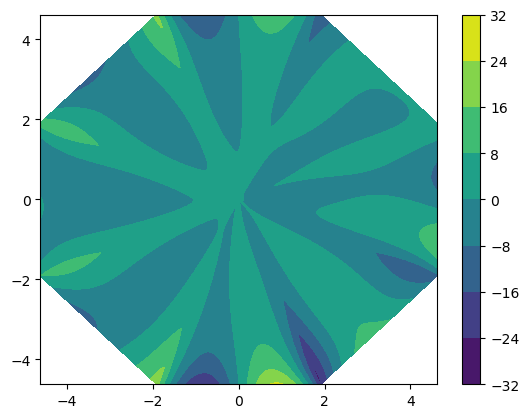

----- Approx 8 -----


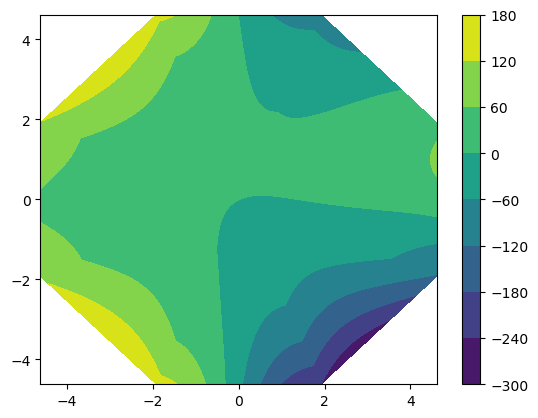

----- Defect 8 -----


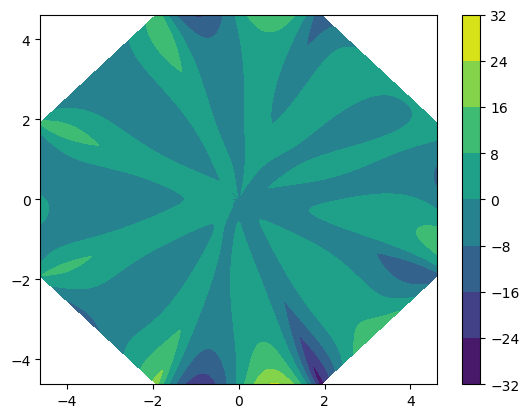

----- Approx 9 -----


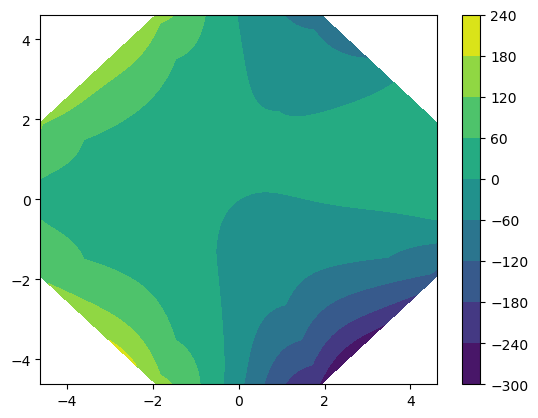

----- Defect 9 -----


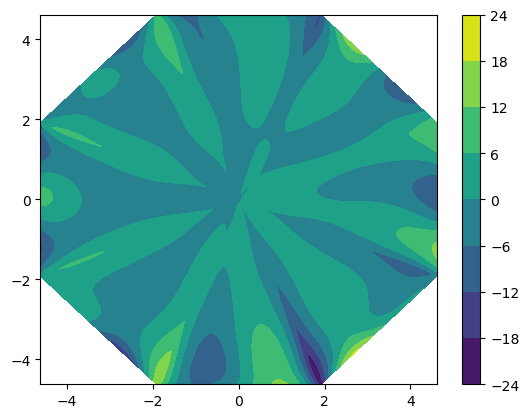

----- Approx 10 -----


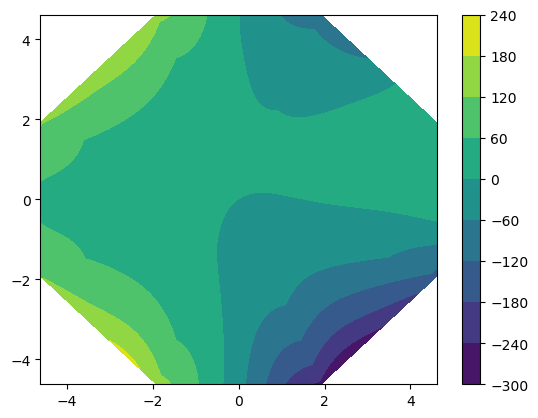

----- Defect 10 -----


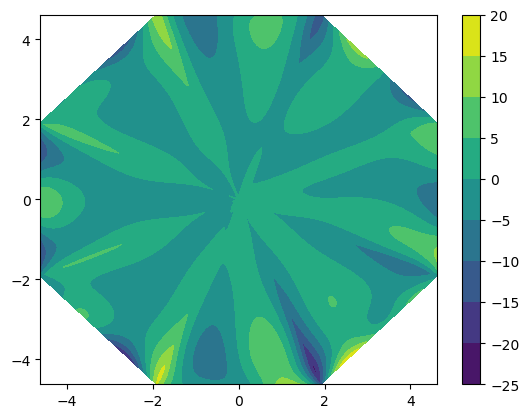

----- Approx 11 -----


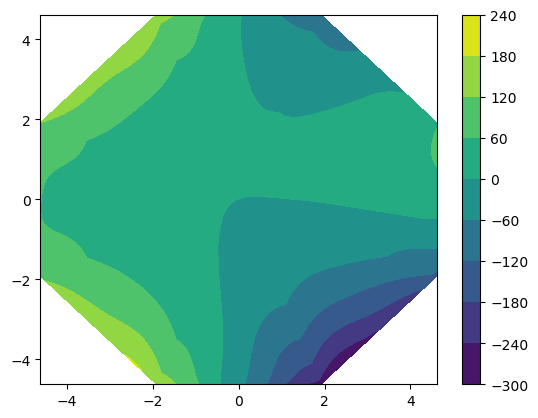

----- Defect 11 -----


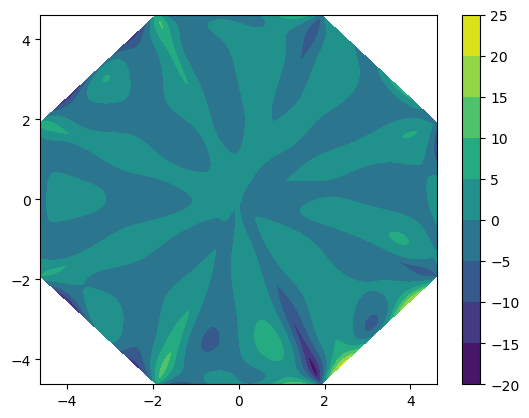

----- Approx 12 -----


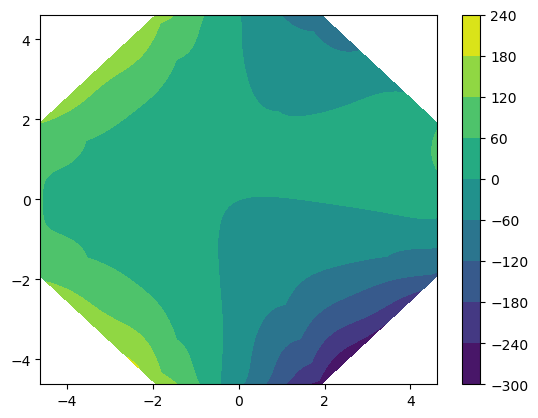

----- Defect 12 -----


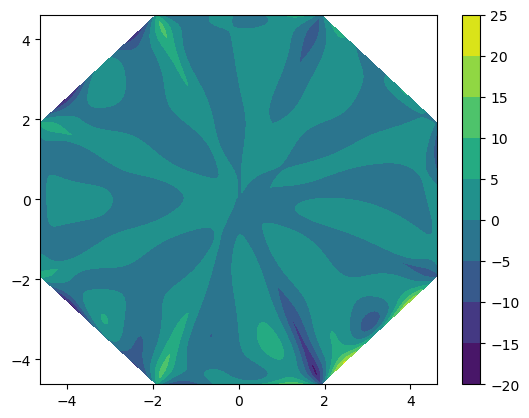

----- Approx 13 -----


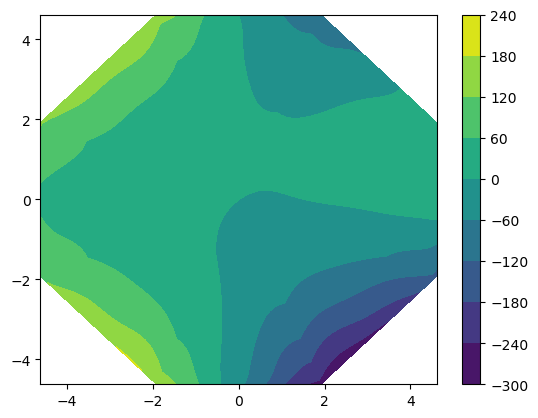

----- Defect 13 -----


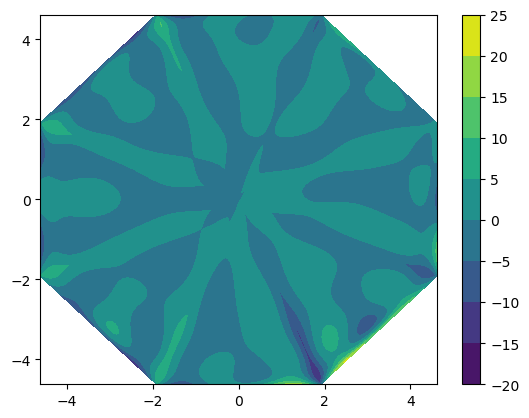

----- Approx 14 -----


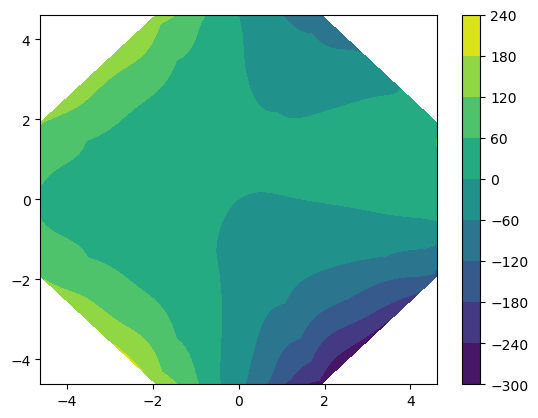

----- Defect 14 -----


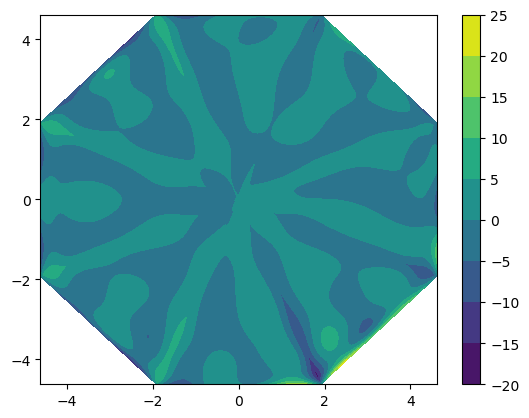

----- Approx 15 -----


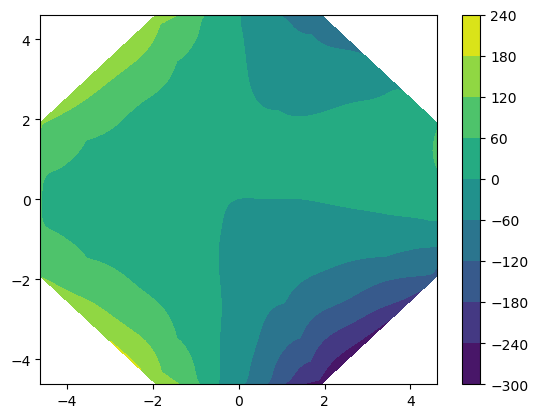

----- Defect 15 -----


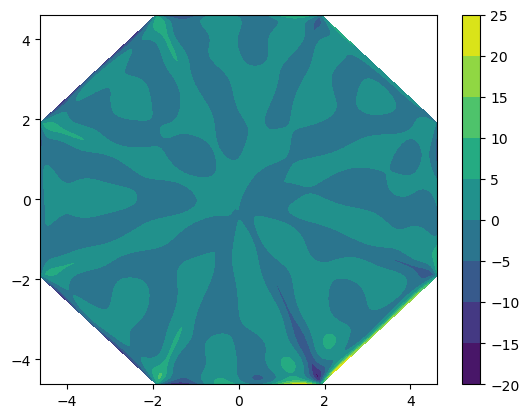

----- Approx 16 -----


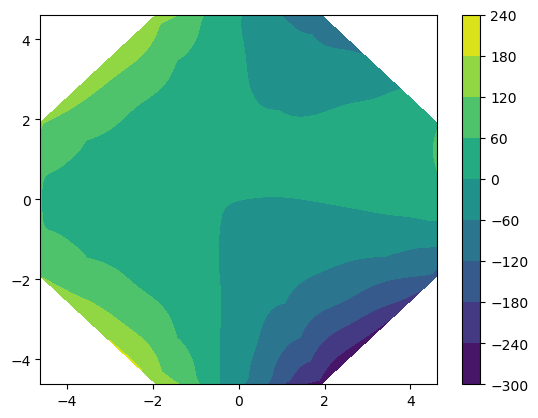

----- Defect 16 -----


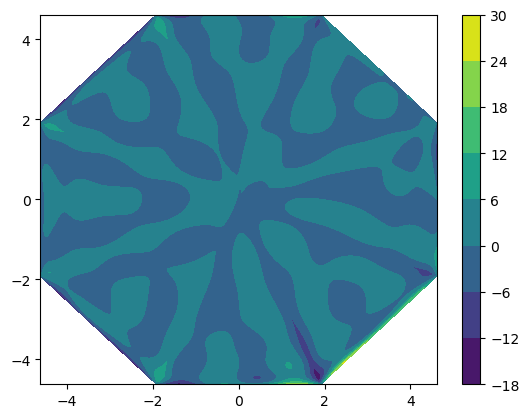

----- Approx 17 -----


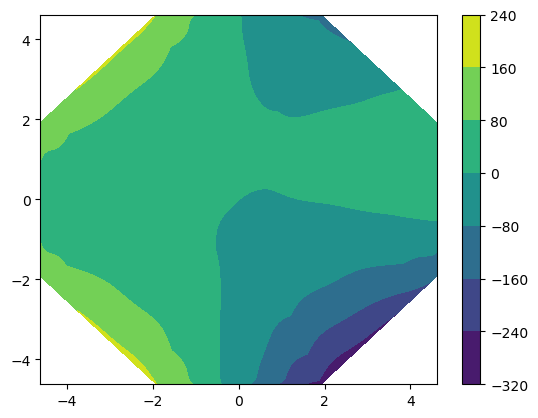

----- Defect 17 -----


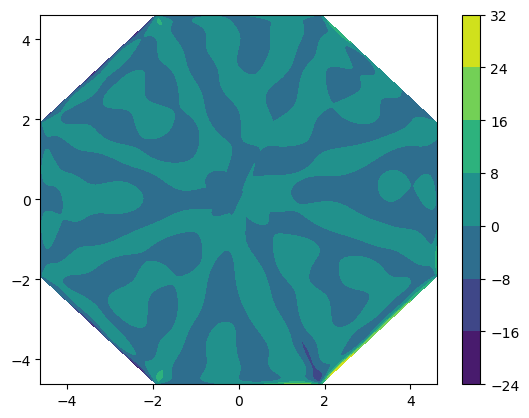

----- Approx 18 -----


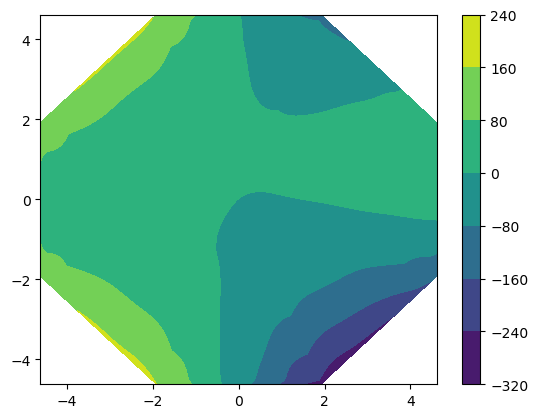

----- Defect 18 -----


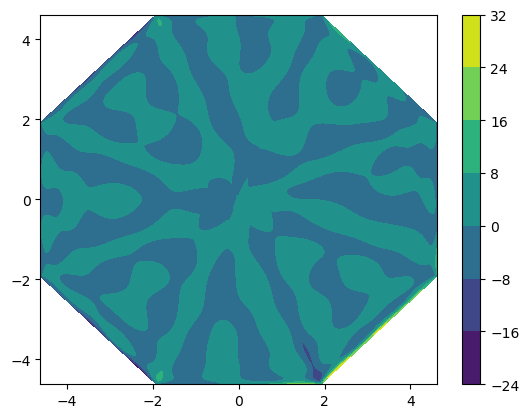

----- Approx 19 -----


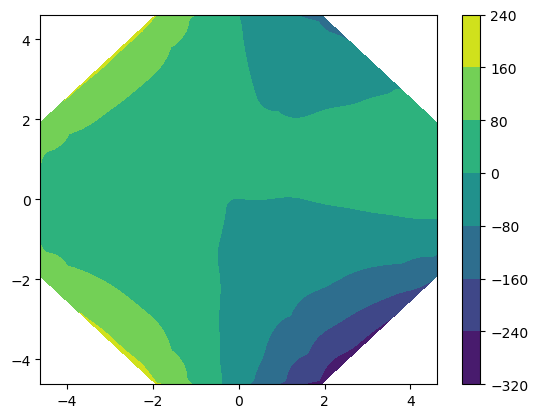

----- Defect 19 -----


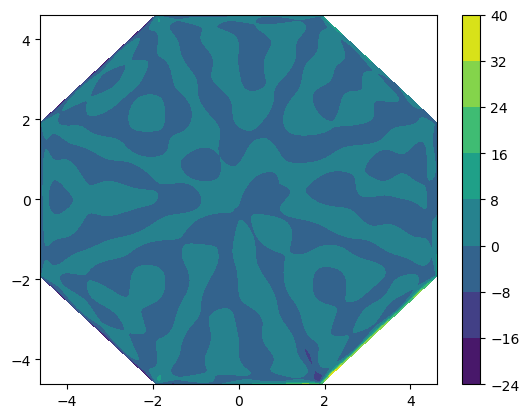

----- Approx 20 -----


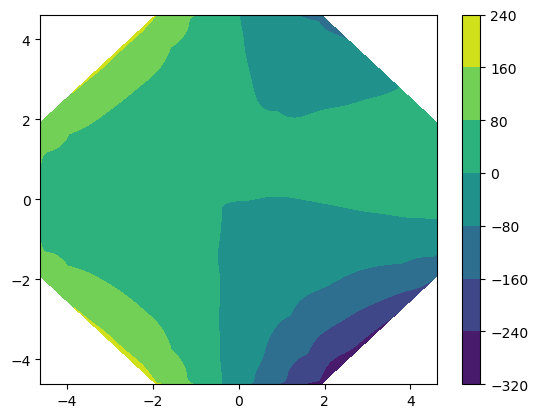

----- Defect 20 -----


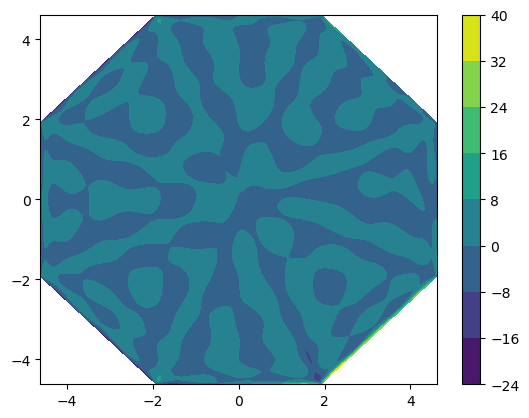

In [23]:
F1 = input_function(x1000,y1000)
F2 = 0

print('----- Analytical -----')
plotter(x1000,y1000,F1)

for n in range(21):
    # approximation of f
    F2 += fh_n(n,r1000,theta1000)
    print('----- Approx {} -----'.format(n))
    plotter(x1000,y1000,F2)

    # defect b/w analytical and approximation
    F3 = F1 - F2
    # plotting
    print('----- Defect {} -----'.format(n))
    plotter(x1000,y1000,F3)

# $L^{2}$ Norm

## K

### Getting Norm and Runtime

In [24]:
# higher order Results in dtype to be set as 0 and not float64
F1 = input_function(x1000,y1000)
F2 = 0

errs_k = []
runtimes_k = []

ti = time.time()
for n in range(21):
    print('working on n={} calculation'.format(n))
    F2 += fk_n(n,r1000,theta1000)
    F3 = F1 - F2
    
    err = la.norm(F3,2) / la.norm(F1,2)
    errs_k.append(err)

    tf = time.time()
    runtimes_k.append(tf-ti)

working on n=0 calculation
working on n=1 calculation
working on n=2 calculation
working on n=3 calculation
working on n=4 calculation
working on n=5 calculation
working on n=6 calculation
working on n=7 calculation
working on n=8 calculation
working on n=9 calculation
working on n=10 calculation
working on n=11 calculation
working on n=12 calculation
working on n=13 calculation
working on n=14 calculation
working on n=15 calculation
working on n=16 calculation
working on n=17 calculation
working on n=18 calculation
working on n=19 calculation
working on n=20 calculation


### Plotting

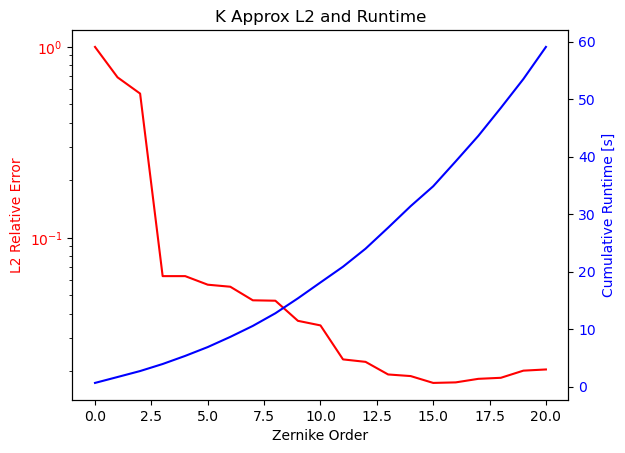

In [54]:
fig, ax1 = plt.subplots()
ax1.set_title('K Approx L2 and Runtime')

ax1.set_xlabel('Zernike Order')
ax1.set_yscale('log')
ax1.set_ylabel('L2 Relative Error', color='r')
ax1.plot(errs_k, color='r')
ax1.tick_params(axis='y',labelcolor='r')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Runtime [s]', color='b')
ax2.plot(runtimes_k, color='b')
ax2.tick_params(axis='y',labelcolor='b')

## H

### Getting Norm and Runtime

In [26]:
# higher order Results in dtype to be set as 0 and not float64
F1 = input_function(x1000,y1000)
F2 = 0

errs_h = []
runtimes_h = []

ti = time.time()
for n in range(21):
    print('working on n={} calculation'.format(n))
    F2 += fh_n(n,r1000,theta1000)
    F3 = F1 - F2
    
    err = la.norm(F3,2) / la.norm(F1,2)
    errs_h.append(err)

    tf = time.time()
    runtimes_h.append(tf-ti)

working on n=0 calculation
working on n=1 calculation
working on n=2 calculation
working on n=3 calculation
working on n=4 calculation
working on n=5 calculation
working on n=6 calculation
working on n=7 calculation
working on n=8 calculation
working on n=9 calculation
working on n=10 calculation
working on n=11 calculation
working on n=12 calculation
working on n=13 calculation
working on n=14 calculation
working on n=15 calculation
working on n=16 calculation
working on n=17 calculation
working on n=18 calculation
working on n=19 calculation
working on n=20 calculation


### Plotting

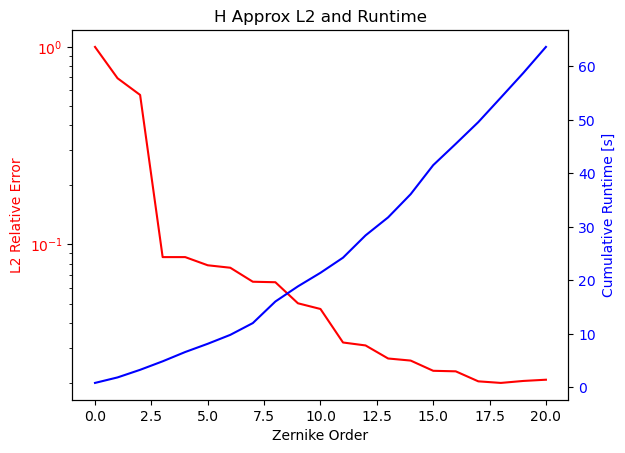

In [38]:
fig, ax1 = plt.subplots()
ax1.set_title('H Approx L2 and Runtime')

ax1.set_xlabel('Zernike Order')
ax1.set_yscale('log')
ax1.set_ylabel('L2 Relative Error', color='r')
ax1.plot(errs_h, color='r')
ax1.tick_params(axis='y',labelcolor='r')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Runtime [s]', color='b')
ax2.plot(runtimes_h, color='b')
ax2.tick_params(axis='y',labelcolor='b')

## Comparing K and H approximations

### Graphical

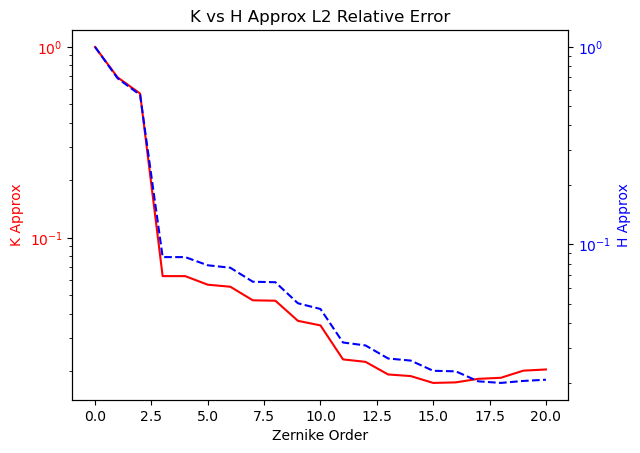

In [55]:
fig, ax1 = plt.subplots()
ax1.set_title('K vs H Approx L2 Relative Error')

ax1.set_xlabel('Zernike Order')
ax1.set_ylabel('K Approx', color='r')
ax1.plot(errs_k, color='r')
ax1.tick_params(axis='y',labelcolor='r')

ax2 = ax1.twinx()
ax2.set_ylabel('H Approx', color='b')
ax2.plot(errs_h, color='b', linestyle='--')
ax2.tick_params(axis='y',labelcolor='b')

ax1.set_yscale('log')
ax2.set_yscale('log')

### Tabularized Data

In [40]:
# a,b = np.array(errs_k, errs_h)
# plot the difference between the two

l2_df = np.array([errs_k,errs_h]).T
l2_df = pd.DataFrame(l2_df)
l2_df.columns = ['k', 'h']
l2_df

,k,h
0,0.995588,0.995595
1,0.690128,0.691327
2,0.567611,0.569341
3,0.062992,0.086248
4,0.062992,0.086247
5,0.056814,0.078421
6,0.055439,0.076208
7,0.047077,0.064752
8,0.046843,0.064378
9,0.036769,0.050390


# $L^{\infty}$ Norm

## K

### Getting Norm

In [30]:
F1 = input_function(x1000,y1000)
F2 = 0

err_inf_k = []
for n in range(21):
    print('working on n={} calculation'.format(n))
    F2 += fk_n(n,r1000,theta1000)
    err = np.max(F1-F2)
    err_inf_k.append(err)

working on n=0 calculation
working on n=1 calculation
working on n=2 calculation
working on n=3 calculation
working on n=4 calculation
working on n=5 calculation
working on n=6 calculation
working on n=7 calculation
working on n=8 calculation
working on n=9 calculation
working on n=10 calculation
working on n=11 calculation
working on n=12 calculation
working on n=13 calculation
working on n=14 calculation
working on n=15 calculation
working on n=16 calculation
working on n=17 calculation
working on n=18 calculation
working on n=19 calculation
working on n=20 calculation


### Plotting

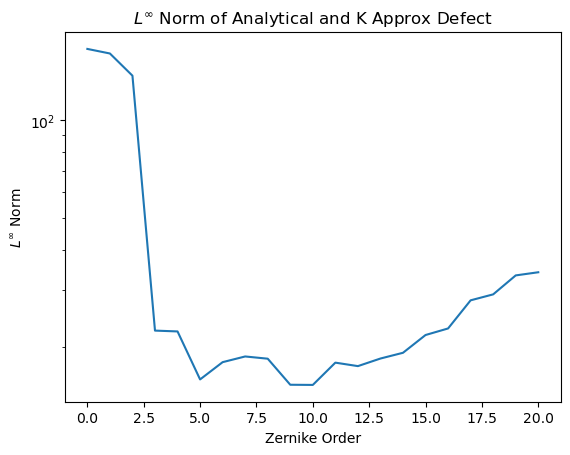

In [47]:
plt.semilogy(err_inf_k)
plt.title('$L^{\infty}$ Norm of Analytical and K Approx Defect')
plt.xlabel('Zernike Order')
plt.ylabel('$L^{\infty}$ Norm')
plt.show()

## H

### Getting Norm

In [32]:
F1 = input_function(x1000,y1000)
F2 = 0

err_inf_h = []
for n in range(21):
    print('working on n={} calculation'.format(n))
    F2 += fh_n(n,r1000,theta1000)
    err = np.max(F1-F2)
    err_inf_h.append(err)

working on n=0 calculation
working on n=1 calculation
working on n=2 calculation
working on n=3 calculation
working on n=4 calculation
working on n=5 calculation
working on n=6 calculation
working on n=7 calculation
working on n=8 calculation
working on n=9 calculation
working on n=10 calculation
working on n=11 calculation
working on n=12 calculation
working on n=13 calculation
working on n=14 calculation
working on n=15 calculation
working on n=16 calculation
working on n=17 calculation
working on n=18 calculation
working on n=19 calculation
working on n=20 calculation


### Plotting

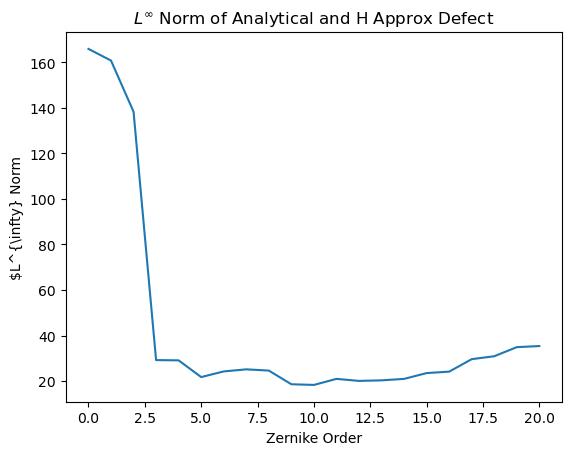

In [48]:
plt.plot(err_inf_h)
plt.title('$L^{\infty}$ Norm of Analytical and H Approx Defect')
plt.xlabel('Zernike Order')
plt.ylabel('$L^{\infty} Norm')
plt.show()

## Comparsion b/w K and H

### Graphical

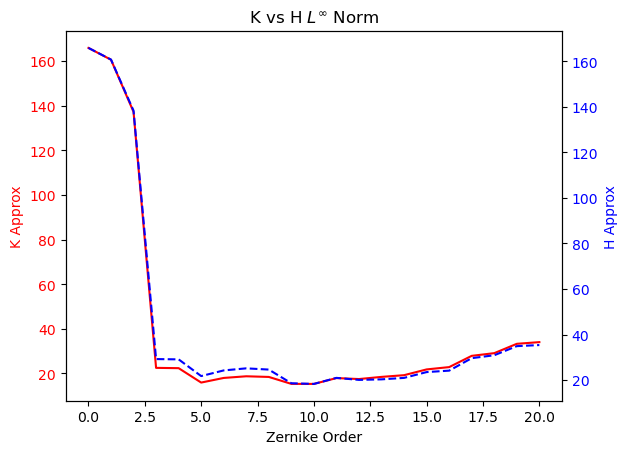

In [49]:
fig, ax1 = plt.subplots()
ax1.set_title('K vs H $L^{\infty}$ Norm')

ax1.set_xlabel('Zernike Order')
ax1.set_ylabel('K Approx', color='r')
ax1.plot(err_inf_k, color='r')
ax1.tick_params(axis='y',labelcolor='r')

ax2 = ax1.twinx()
ax2.set_ylabel('H Approx', color='b')
ax2.plot(err_inf_h, color='b', linestyle='--')
ax2.tick_params(axis='y',labelcolor='b')

### Tabularized Data

In [35]:
loo_df = np.array([err_inf_k,err_inf_h]).T
loo_df = pd.DataFrame(loo_df)
loo_df.columns = ['k', 'h']
loo_df

,k,h
0,165.941278,165.905726
1,160.653832,160.794535
2,137.261838,138.339737
3,22.511266,29.221221
4,22.379583,29.095938
5,15.922718,21.756312
6,17.997939,24.239471
7,18.739574,25.152603
8,18.445484,24.608683
9,15.333101,18.603589
